In [1]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Renewal_data_extract_new.csv')
df_dic = pd.read_excel('/content/Renewal Data Dictionary.xlsx')

In [ ]:
df_dic

,Column Name,Defintion
0,state,State the customer lives in
1,communication_preference,Preferred communication method (email or letter)
2,green,Yes/No does the customer pay for green electricty
3,dual_fuel_customer,Yes/No does the customer also have a gas accou...
4,direct_debit_flag,Yes/No does the customer pay via direct debit ...
5,usage,Annual usage (MWh) of the customers
6,cust_tenure,Number of years the customer has been with the...
7,years_on_disc,Number of years the customer has been on a con...
8,age,Age of customer in 10 year buckets
9,before_discount,Discount customer was on prior to the renewal


In [ ]:
df.head()

,state,communication_preference,green,dual_fuel_customer,direct_debit_flag,usage,cust_tenure,years_on_disc,age,before_discount,before_channel,renewal_date,treatment_given,discount_offered,renewal_outcome,customer_id
0,State 1,Letter,Yes,No,Yes,4.730801,5,3,45-55,0.22,Mover_channel,2019-08-01,Same Contract,0.22,Accepted,3df61847-c4c6-46ff-801c-91c8314663ed
1,State 1,Letter,Yes,Yes,Yes,2.443742,5,5,45-55,0.26,Acquired_directly,2019-08-01,Same Contract,0.26,Accepted,5725fb34-bdb3-46c4-ad46-492318249972
2,State 1,Letter,Yes,Yes,Yes,1.809037,5,4,45-55,0.24,Acquired_directly,2019-10-01,Same Contract,0.24,Accepted,eb342349-6a59-42d5-be10-7c9aff0bd6a4
3,State 4,Letter,Yes,No,Yes,4.488907,2,2,Under 25,0.18,Acquired_directly,2019-08-01,Same Contract,0.18,Accepted,943be552-9f76-49aa-aa60-2afd2e2f1b1d
4,State 1,Letter,Yes,No,Yes,6.350824,5,5,65+,0.22,Mover_channel,2019-09-01,Same Contract,0.22,Accepted,e19dad39-5b11-49a0-929c-126055938bd9


In [ ]:
df['renewal_outcome'].value_counts(normalize = True)

,proportion
renewal_outcome,
Accepted,0.641034
Call_Back,0.333235
Churn,0.025731


In [ ]:
df.shape

(869473, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869473 entries, 0 to 869472
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   state                     869473 non-null  object 
 1   communication_preference  869473 non-null  object 
 2   green                     869296 non-null  object 
 3   dual_fuel_customer        869296 non-null  object 
 4   direct_debit_flag         869473 non-null  object 
 5   usage                     869473 non-null  float64
 6   cust_tenure               869473 non-null  int64  
 7   years_on_disc             869473 non-null  int64  
 8   age                       869473 non-null  object 
 9   before_discount           869296 non-null  float64
 10  before_channel            867536 non-null  object 
 11  renewal_date              869473 non-null  object 
 12  treatment_given           869473 non-null  object 
 13  discount_offered          869330 non-null  f

In [3]:
numerical_features = [
    'usage',
    'cust_tenure',
    'years_on_disc',
    'before_discount',
    'discount_offered'
]

# 'renewal_date' is object - needs conversion to datetime for date-based analysis, or treat as categorical string
categorical_features = [
    'state',
    'communication_preference',
    'green',
    'dual_fuel_customer',
    'direct_debit_flag',
    'age',
    'before_channel',
    'renewal_date',
    'treatment_given',
    'renewal_outcome'  # target
]


In [ ]:
df_numerical = df[numerical_features]


descriptive_stats = df_numerical.describe()

print("Descriptive Analysis of Numerical Features:")
print(descriptive_stats)

Descriptive Analysis of Numerical Features:
               usage    cust_tenure  years_on_disc  before_discount  \
count  869473.000000  869473.000000  869473.000000    869296.000000   
mean        5.958729       3.511859       2.805459         0.169743   
std         4.432321       1.670887       1.484081         0.093807   
min         0.001011       0.000000       0.000000         0.000000   
25%         3.130512       2.000000       1.000000         0.100000   
50%         4.943348       4.000000       3.000000         0.160000   
75%         7.599614       5.000000       4.000000         0.230000   
max       207.861515       5.000000       5.000000         0.510000   

       discount_offered  
count     869330.000000  
mean           0.082004  
std            0.092934  
min            0.000000  
25%            0.000000  
50%            0.060000  
75%            0.140000  
max            0.440000  


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and is already loaded

# Define the list of categorical features based on df.info() object types (excluding ID and target)
categorical_features = [
    'state',
    'communication_preference',
    'green',
    'dual_fuel_customer',
    'direct_debit_flag',
    'age',
    'before_channel',
    'renewal_date',
    'treatment_given'
]

print("--- Frequency Counts and Proportions of Categorical Features ---")

for column in categorical_features:
    print(f"\n--- Frequency Analysis for: {column} ---")

    # Calculate value counts
    counts = df[column].value_counts()
    print("Counts:")
    print(counts)

    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)
    print("\nProportions:")
    print(proportions)
    print("-" * 50) # Separator

--- Frequency Counts and Proportions of Categorical Features ---

--- Frequency Analysis for: state ---
Counts:
state
State 1    384526
State 2    245024
State 3    153388
State 4     71042
State 5     15493
Name: count, dtype: int64

Proportions:
state
State 1    0.442252
State 2    0.281807
State 3    0.176415
State 4    0.081707
State 5    0.017819
Name: proportion, dtype: float64
--------------------------------------------------

--- Frequency Analysis for: communication_preference ---
Counts:
communication_preference
Letter    655592
Email     213881
Name: count, dtype: int64

Proportions:
communication_preference
Letter    0.754011
Email     0.245989
Name: proportion, dtype: float64
--------------------------------------------------

--- Frequency Analysis for: green ---
Counts:
green
Yes    856806
No      12490
Name: count, dtype: int64

Proportions:
green
Yes    0.985632
No     0.014368
Name: proportion, dtype: float64
--------------------------------------------------

--- Fr

--- Descriptive Analysis of Categorical Features (Count Plots) ---
Plotting count for: state


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


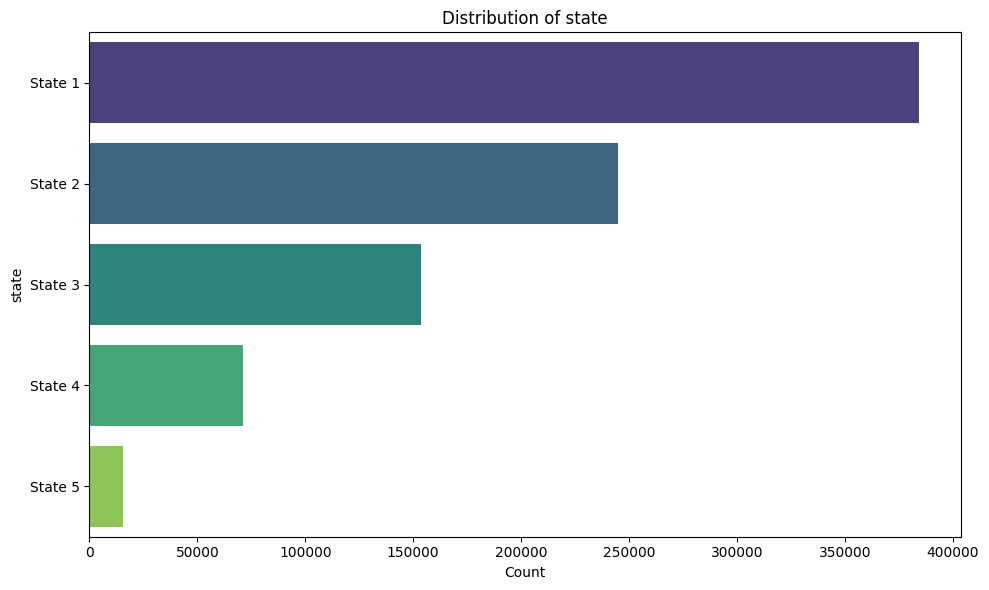

--------------------------------------------------
Plotting count for: communication_preference


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


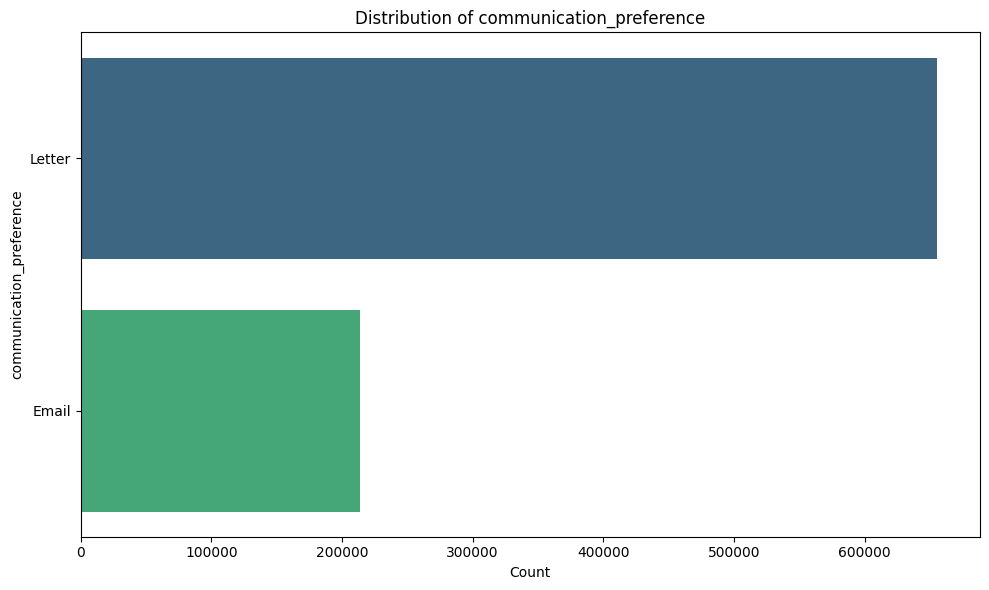

--------------------------------------------------
Plotting count for: green


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


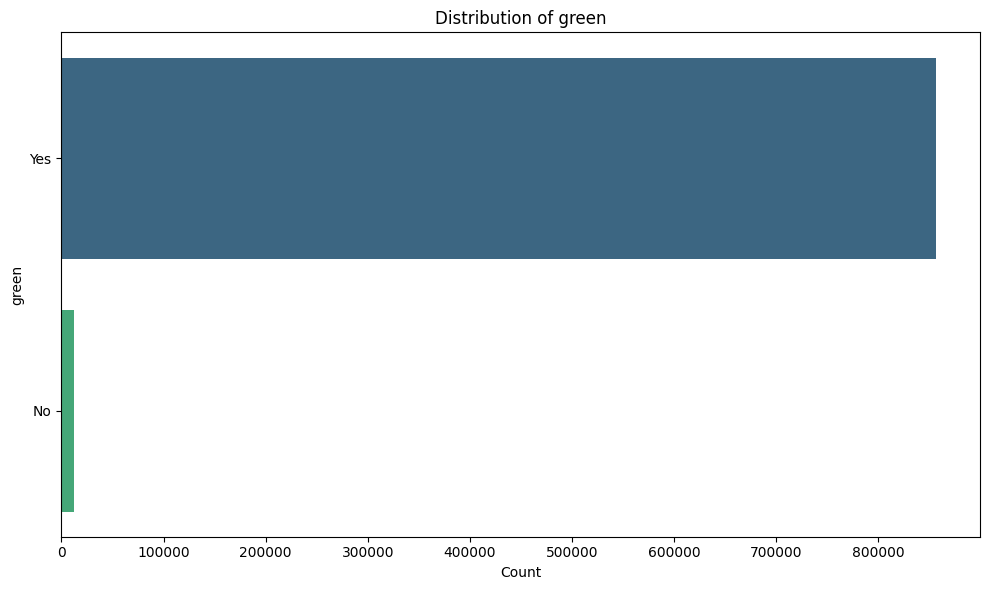

--------------------------------------------------
Plotting count for: dual_fuel_customer


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


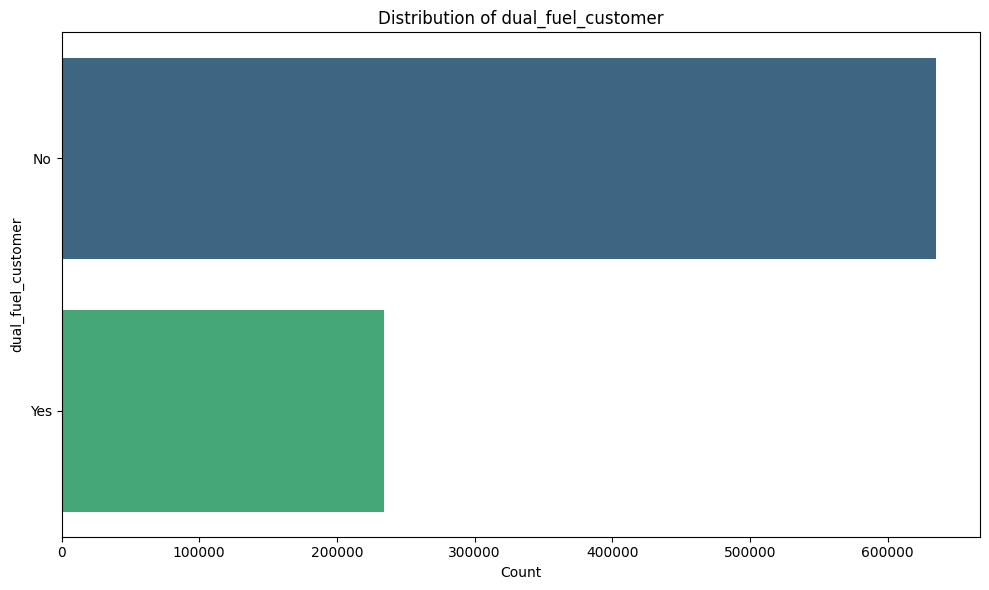

--------------------------------------------------
Plotting count for: direct_debit_flag


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


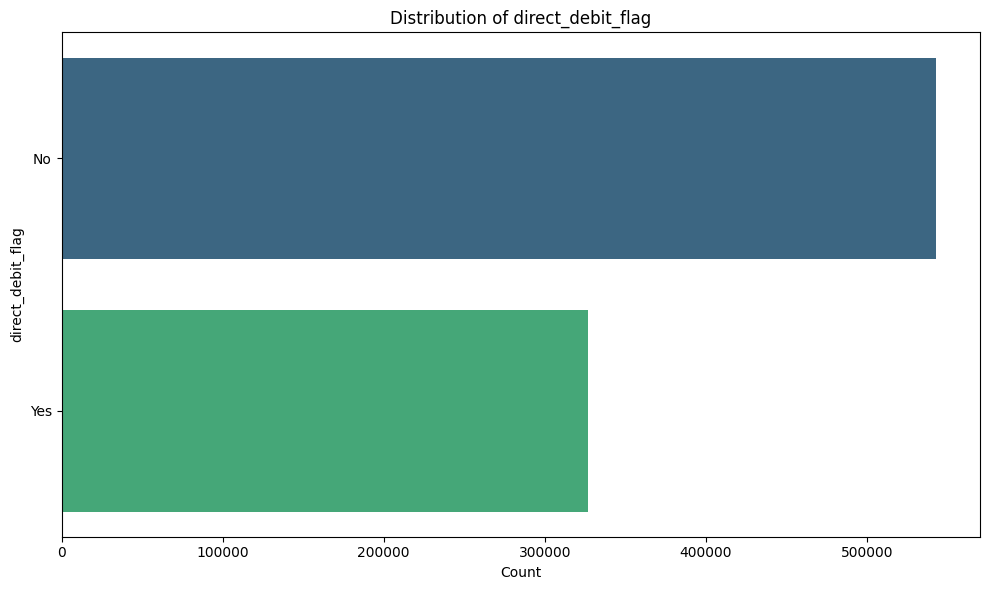

--------------------------------------------------
Plotting count for: age


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


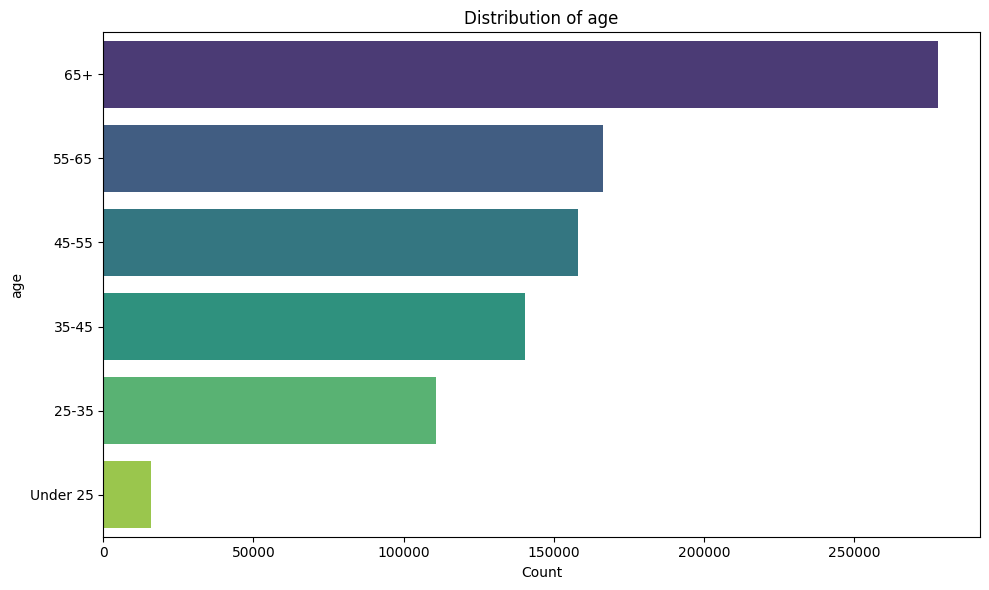

--------------------------------------------------
Plotting count for: before_channel


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


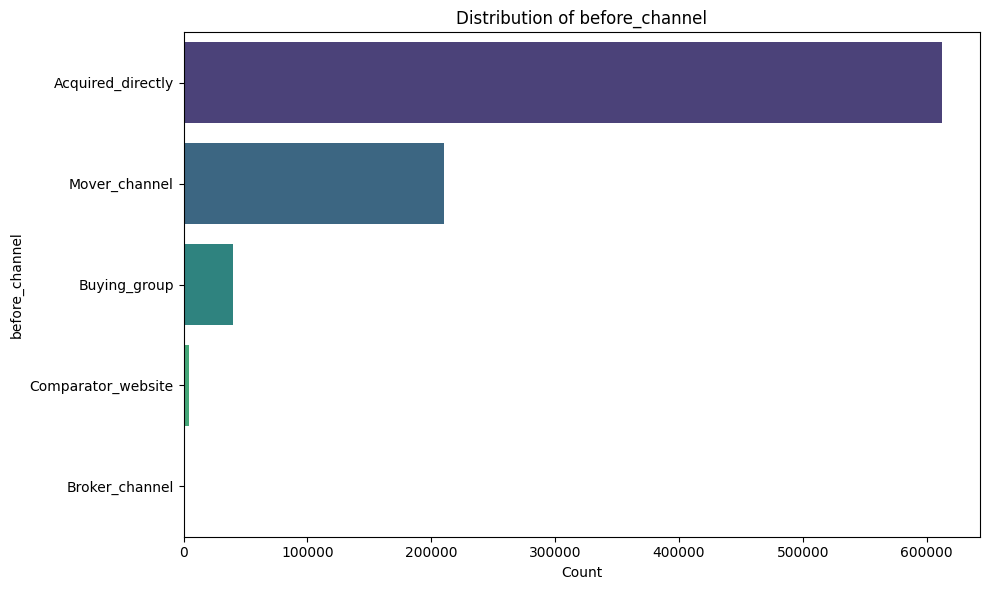

--------------------------------------------------
Plotting count for: renewal_date


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


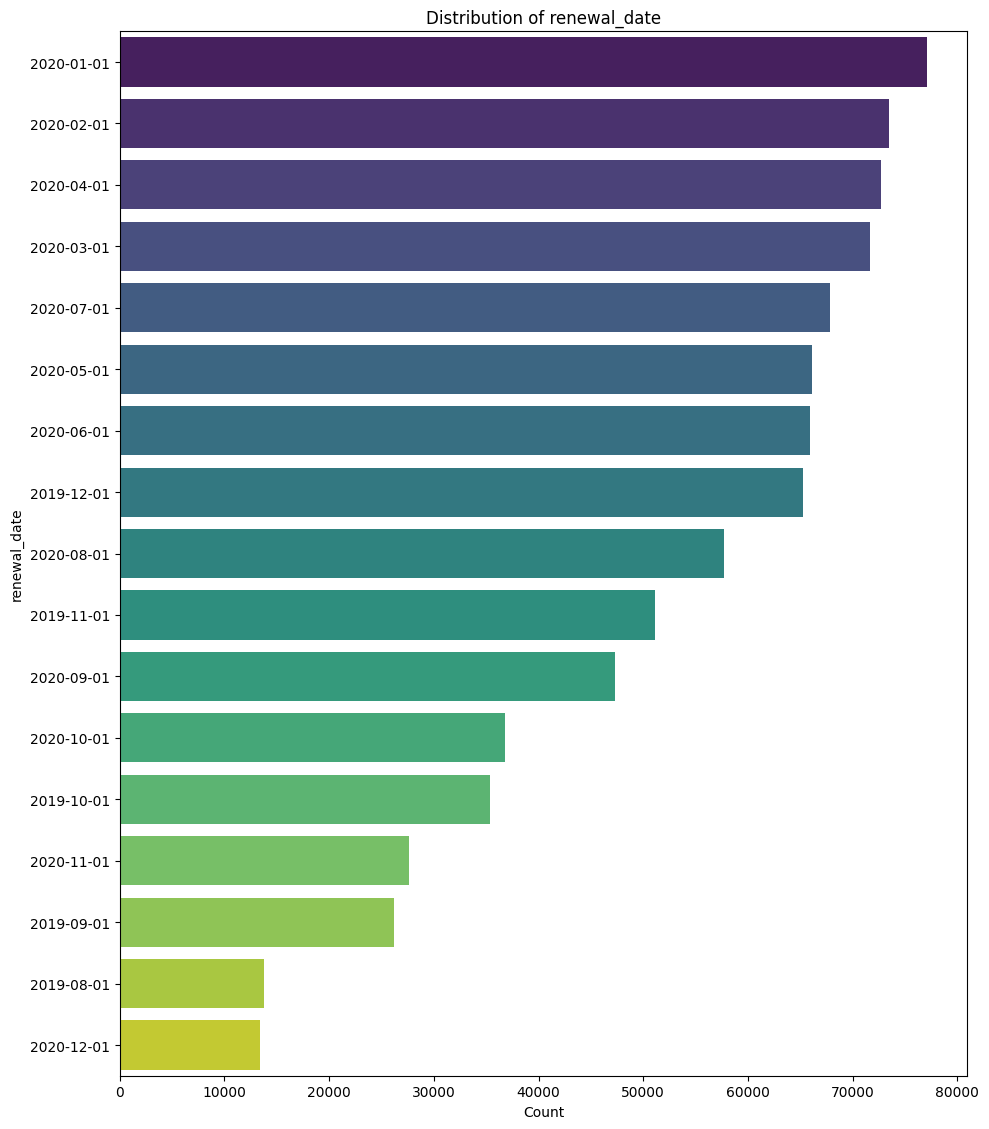

--------------------------------------------------
Plotting count for: treatment_given


<ipython-input-53-c2a4f097b98c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


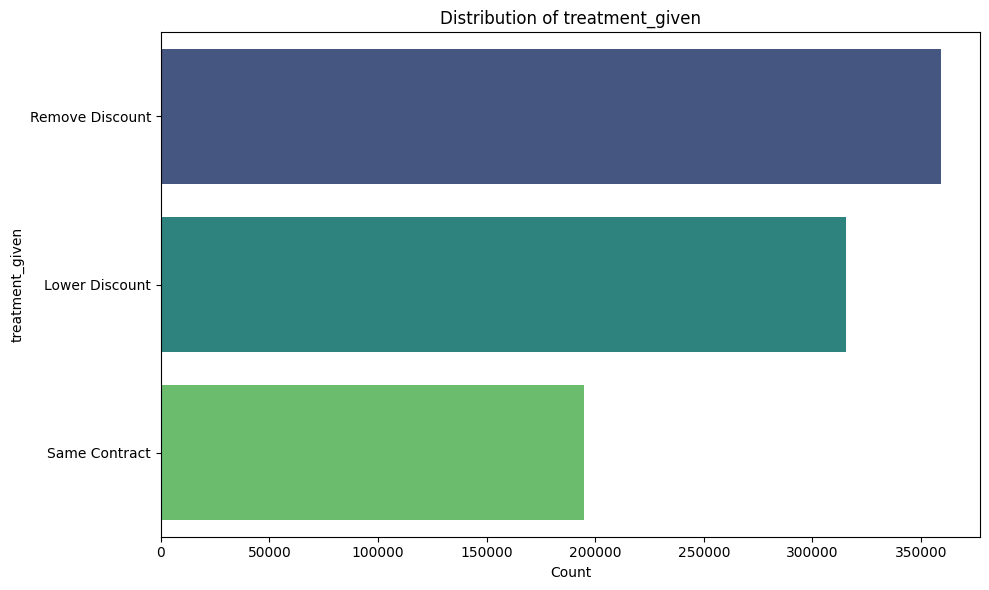

--------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


categorical_features = [
    'state',
    'communication_preference',
    'green',
    'dual_fuel_customer',
    'direct_debit_flag',
    'age',
    'before_channel',
    'renewal_date',
    'treatment_given'
]

print("--- Descriptive Analysis of Categorical Features (Count Plots) ---")

for column in categorical_features:
    print(f"Plotting count for: {column}")

    figsize = (10, 6)
    if df[column].nunique() > 10:
        figsize = (10, 8 + df[column].nunique() * 0.2) # Increase  based on unique values

    plt.figure(figsize=figsize)

    sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')

    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

    plt.tight_layout()

    plt.show()

    print("-" * 50)

Plotting for: usage


<ipython-input-54-1d8d0d237e39>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], ax=axes[0], palette='viridis')
<ipython-input-54-1d8d0d237e39>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[column], ax=axes[1], fill=True, palette='viridis')


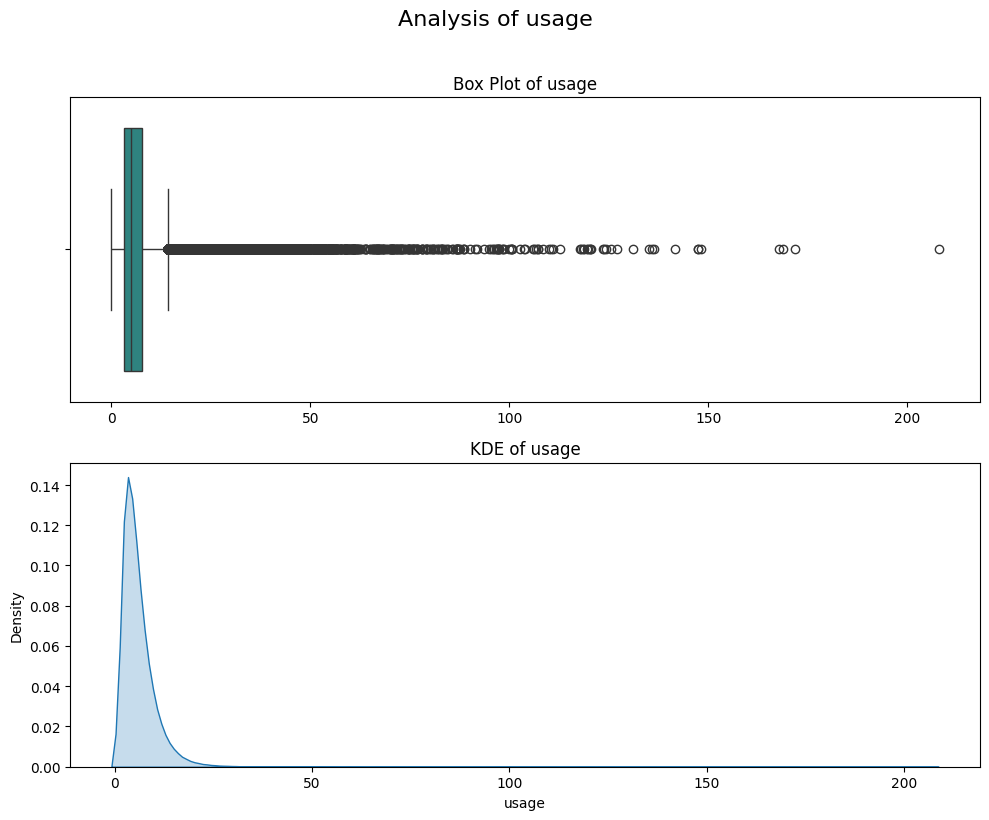

--------------------------------------------------
Plotting for: cust_tenure


<ipython-input-54-1d8d0d237e39>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df[column], order=sorted(df[column].unique()), palette='viridis')


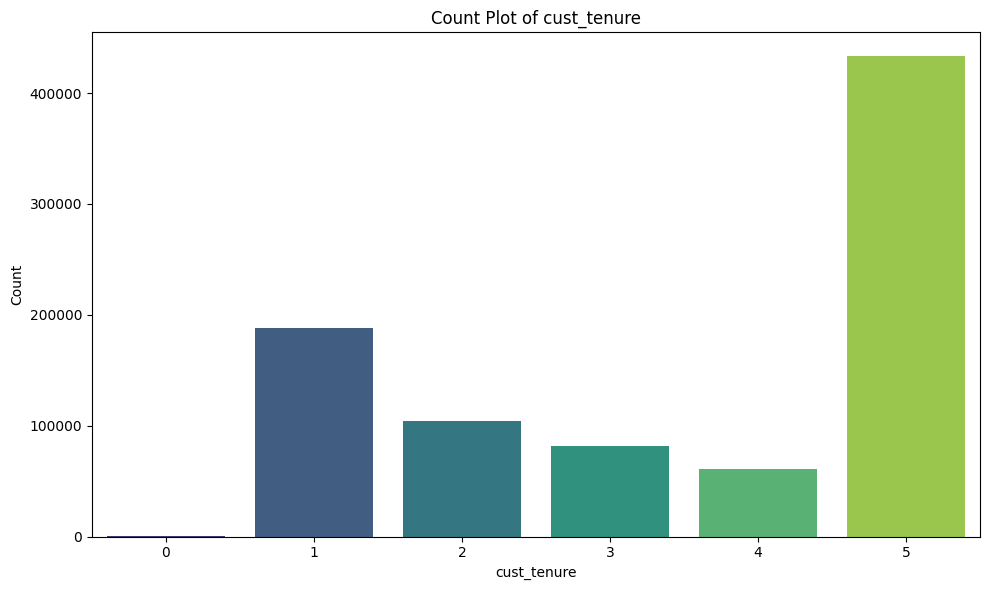

--------------------------------------------------
Plotting for: years_on_disc


<ipython-input-54-1d8d0d237e39>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df[column], order=sorted(df[column].unique()), palette='viridis')


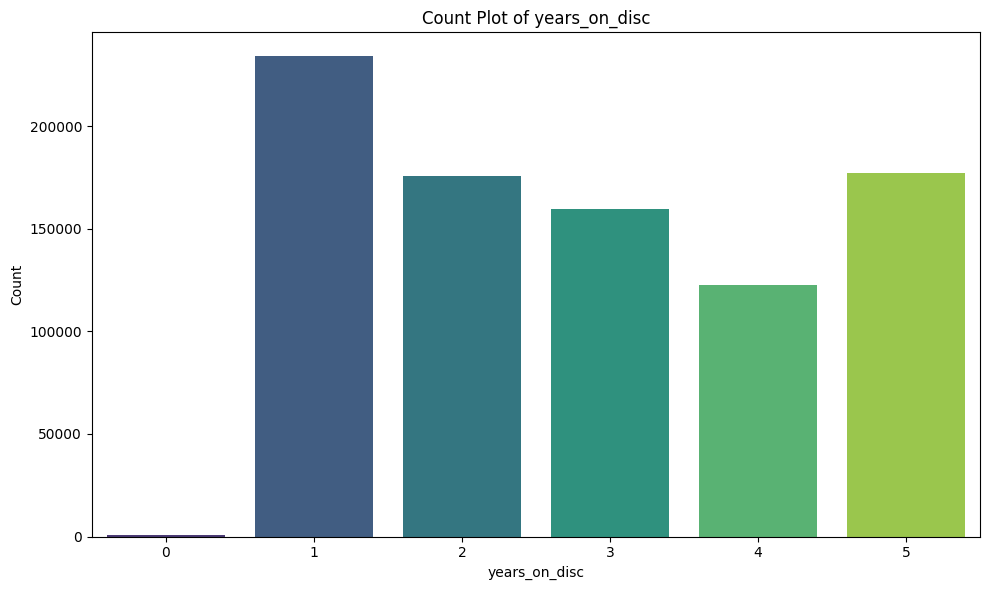

--------------------------------------------------
Plotting for: before_discount


<ipython-input-54-1d8d0d237e39>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], ax=axes[0], palette='viridis')
<ipython-input-54-1d8d0d237e39>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[column], ax=axes[1], fill=True, palette='viridis')


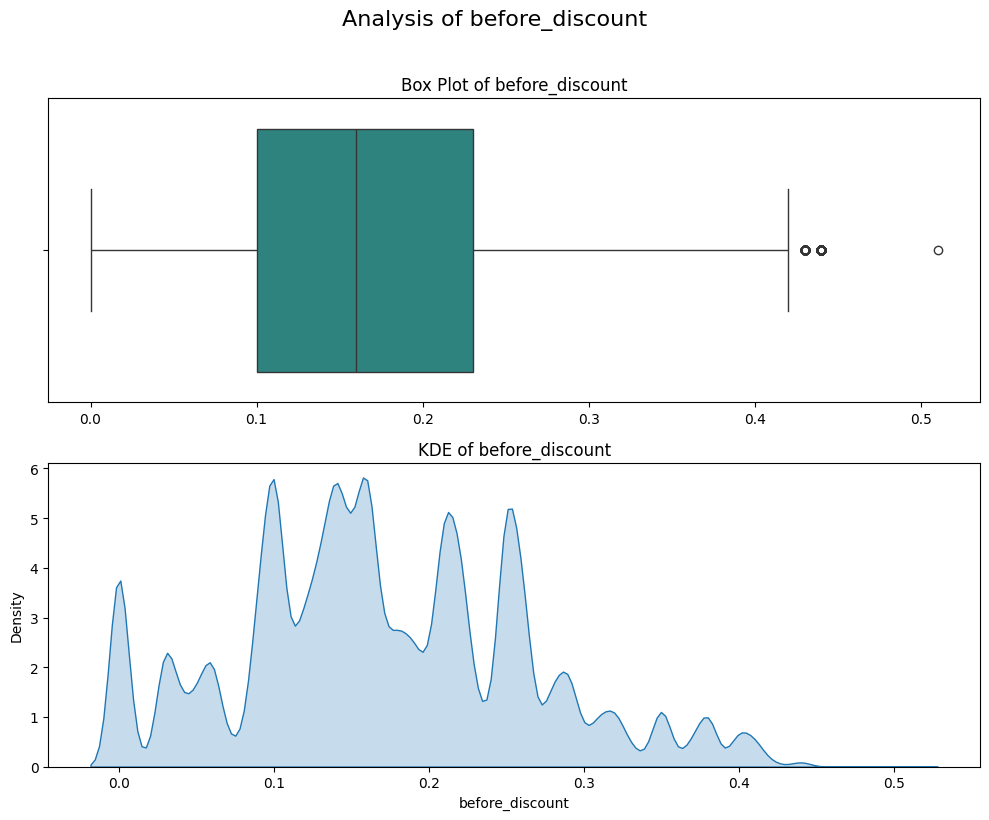

--------------------------------------------------
Plotting for: discount_offered


<ipython-input-54-1d8d0d237e39>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], ax=axes[0], palette='viridis')
<ipython-input-54-1d8d0d237e39>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[column], ax=axes[1], fill=True, palette='viridis')


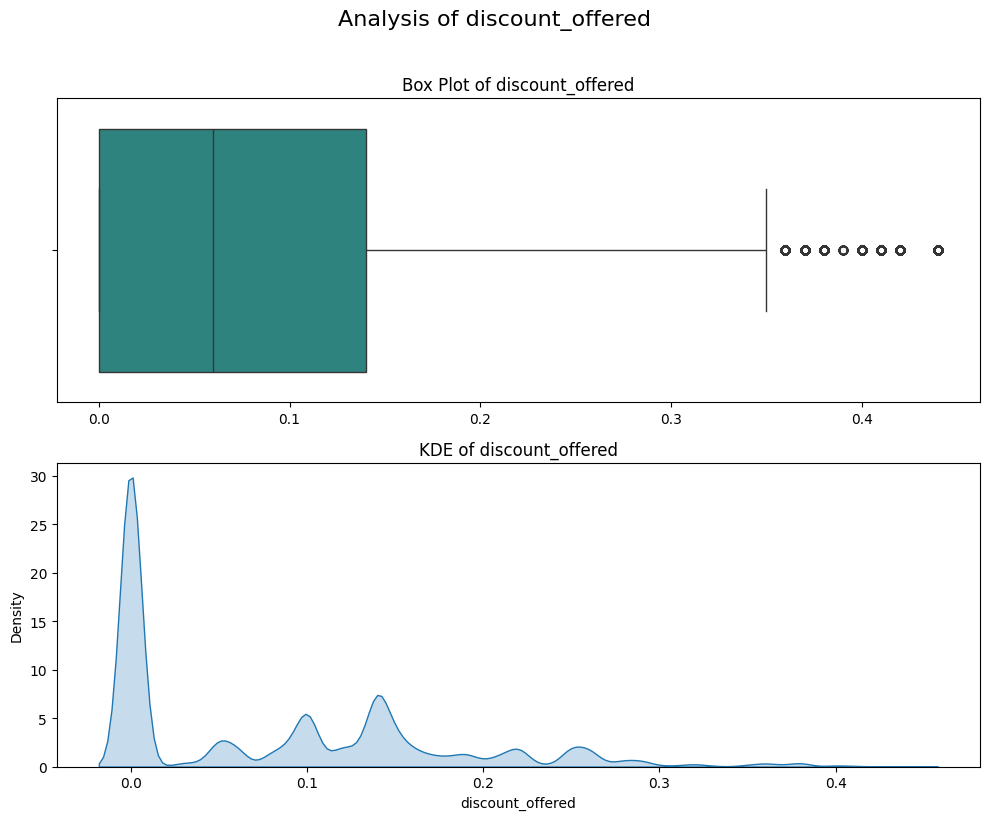

--------------------------------------------------


In [ ]:
numerical_features = [
    'usage',
    'cust_tenure',
    'years_on_disc',
    'before_discount',
    'discount_offered'
]

kde_features = [
    'usage',
    'before_discount',
    'discount_offered'
]

countplot_features = [
    'cust_tenure',
    'years_on_disc'
]

for column in numerical_features:
    print(f"Plotting for: {column}")

    if column in kde_features:
        fig, axes = plt.subplots(2, 1, figsize=(10, 8))

        sns.boxplot(x=df[column], ax=axes[0], palette='viridis')
        axes[0].set_title(f'Box Plot of {column}')
        axes[0].set_xlabel('')

        sns.kdeplot(x=df[column], ax=axes[1], fill=True, palette='viridis')
        axes[1].set_title(f'KDE of {column}')
        axes[1].set_xlabel(column)
        axes[1].set_ylabel('Density')


        fig.suptitle(f'Analysis of {column}', y=1.02, fontsize=16) # y adjusts position

        plt.tight_layout()
        plt.show()

    elif column in countplot_features:
        plt.figure(figsize=(10, 6)) # Single plot figure

        if df[column].nunique() > 50:
             print(f"Warning: '{column}' has {df[column].nunique()} unique values. Count plot might be crowded. Plotting histogram instead.")
             sns.histplot(data=df, x=df[column], palette='viridis', bins=50)
             plt.title(f'Histogram of {column} (too many unique values for count plot)')
        else:

            sns.countplot(data=df, x=df[column], order=sorted(df[column].unique()), palette='viridis')
            plt.title(f'Count Plot of {column}')
            plt.ylabel('Count')

        plt.xlabel(column) # Set x-label
        plt.tight_layout()
        plt.show()



    print("-" * 50)

--- Comparing Numerical Features vs. Target (renewal_outcome) ---
Plotting usage vs. renewal_outcome


<ipython-input-55-33555b88c138>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_variable, y=column, palette='viridis')


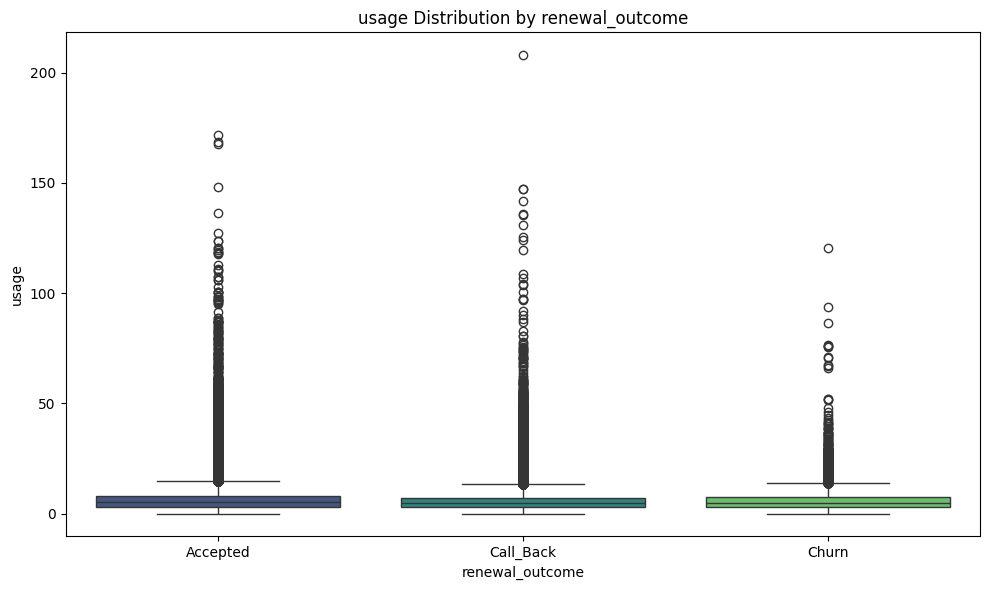

--------------------------------------------------
Plotting before_discount vs. renewal_outcome


<ipython-input-55-33555b88c138>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_variable, y=column, palette='viridis')


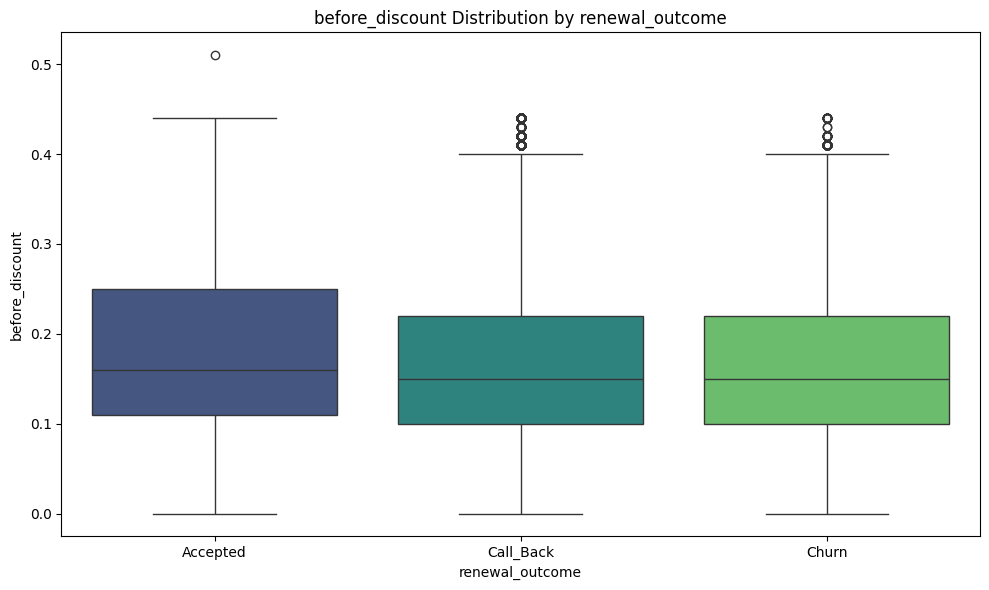

--------------------------------------------------
Plotting discount_offered vs. renewal_outcome


<ipython-input-55-33555b88c138>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_variable, y=column, palette='viridis')


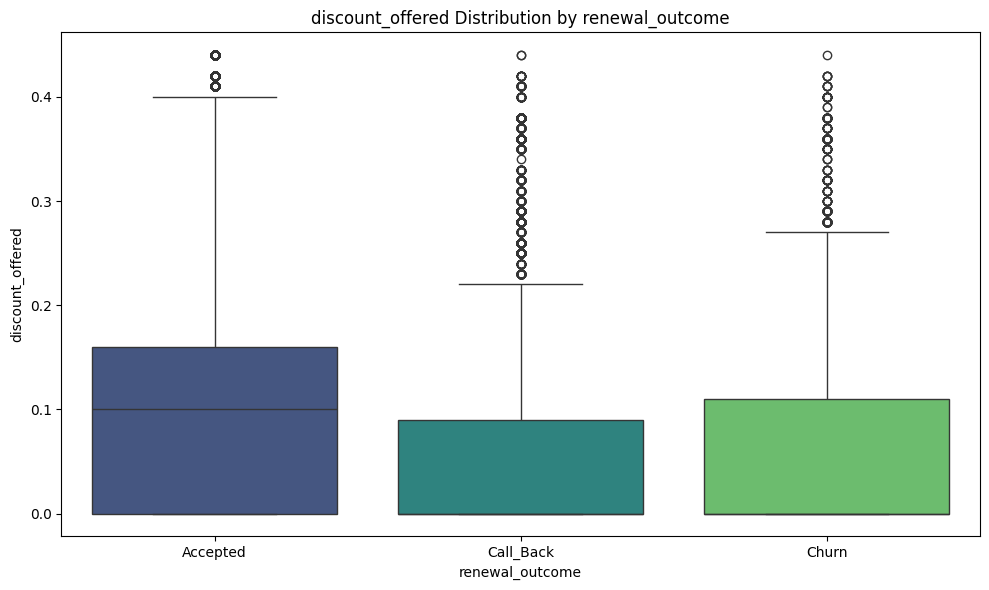

--------------------------------------------------

--- Comparing Categorical Features vs. Target (renewal_outcome) ---
Plotting state vs. renewal_outcome


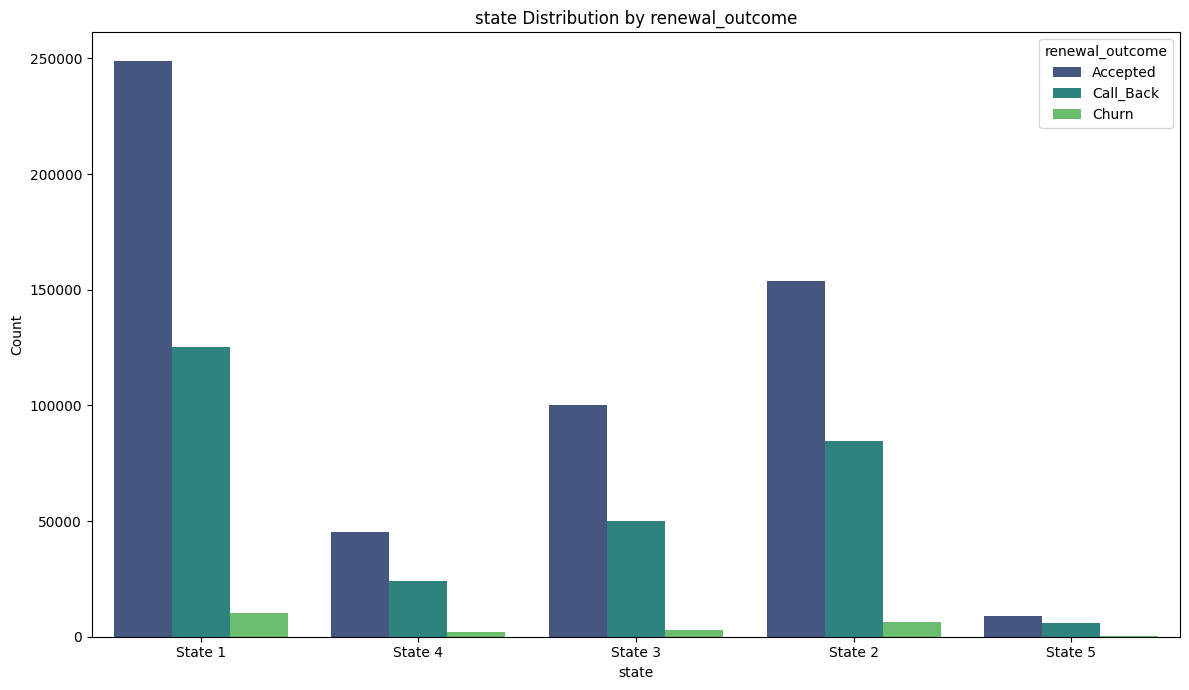

--------------------------------------------------
Plotting communication_preference vs. renewal_outcome


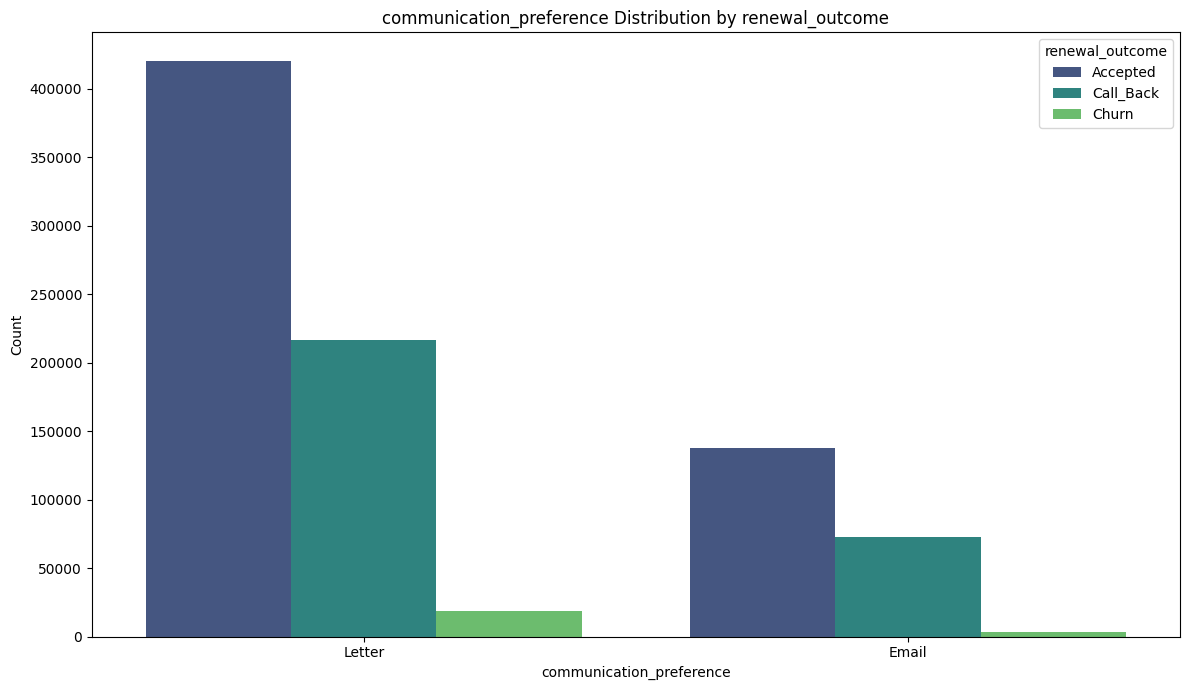

--------------------------------------------------
Plotting green vs. renewal_outcome


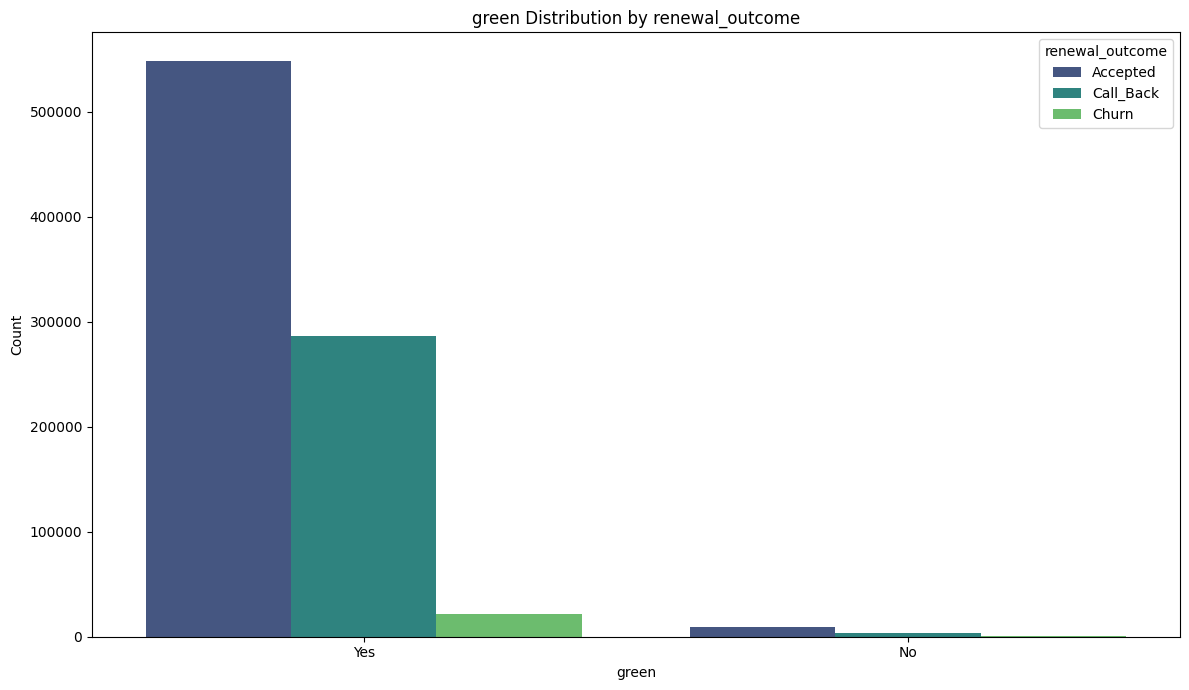

--------------------------------------------------
Plotting dual_fuel_customer vs. renewal_outcome


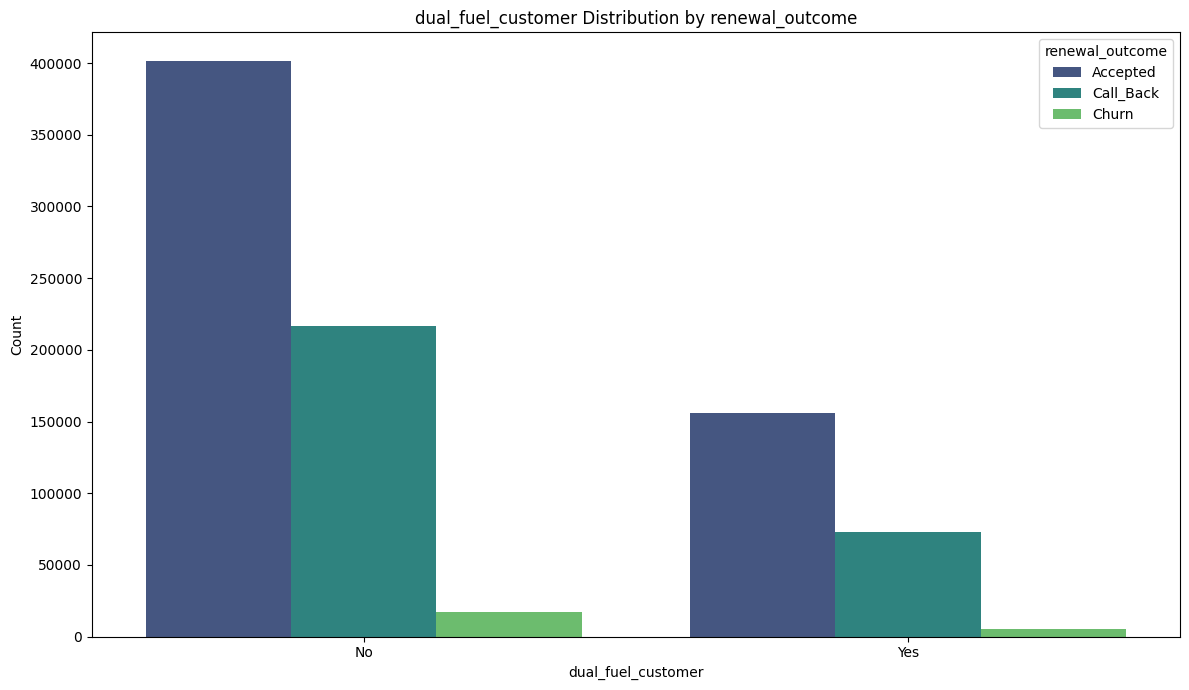

--------------------------------------------------
Plotting direct_debit_flag vs. renewal_outcome


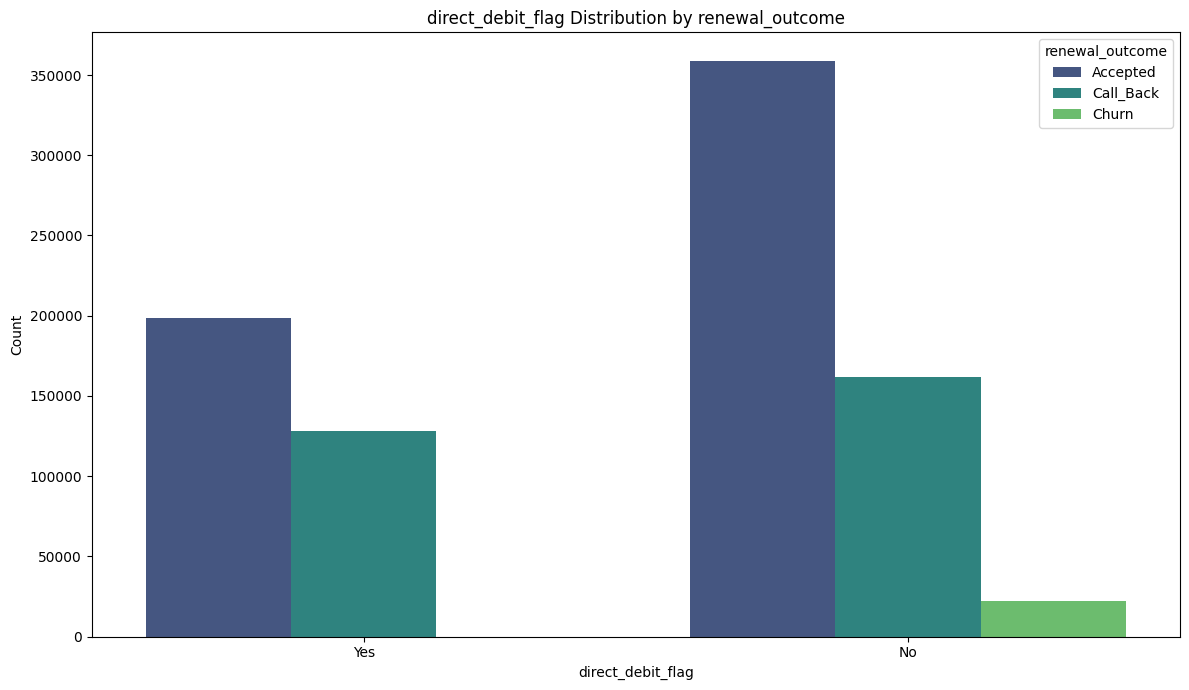

--------------------------------------------------
Plotting age vs. renewal_outcome


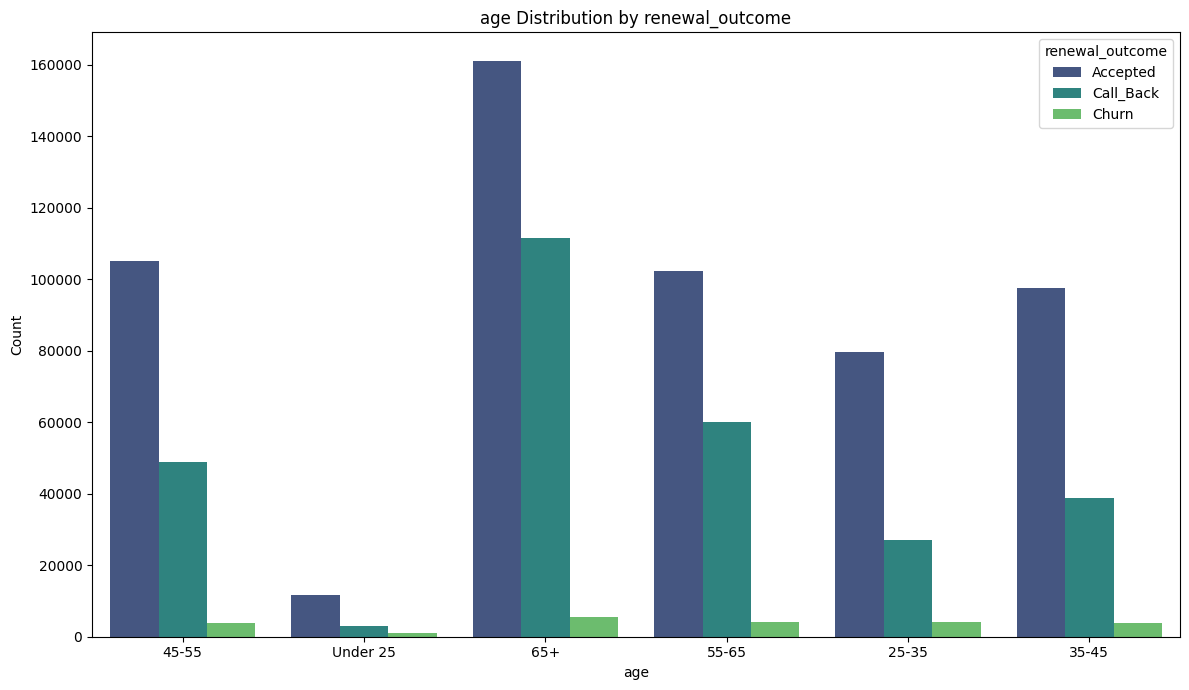

--------------------------------------------------
Plotting before_channel vs. renewal_outcome


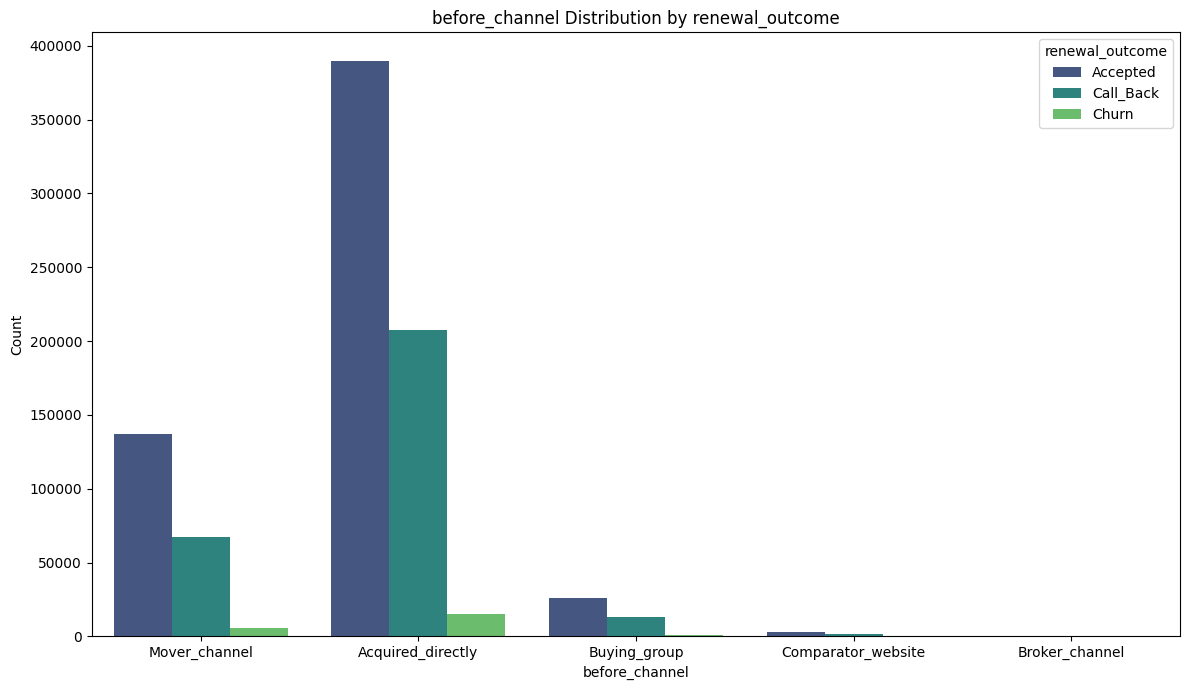

--------------------------------------------------
Plotting renewal_date vs. renewal_outcome


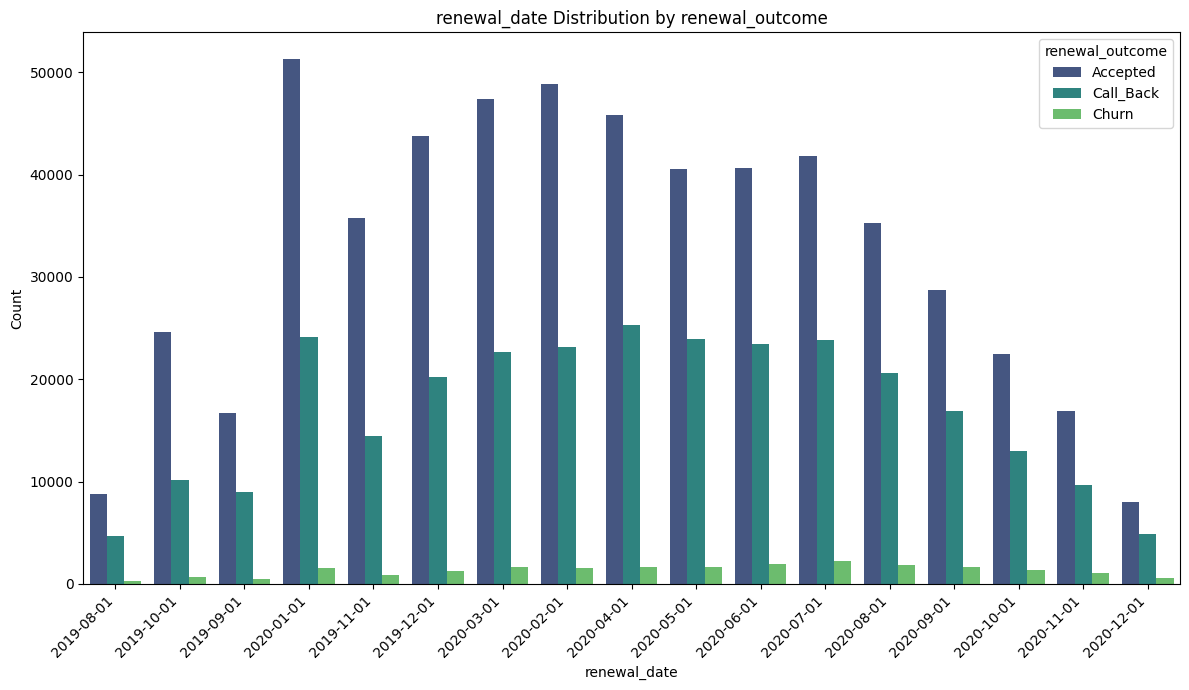

--------------------------------------------------
Plotting treatment_given vs. renewal_outcome


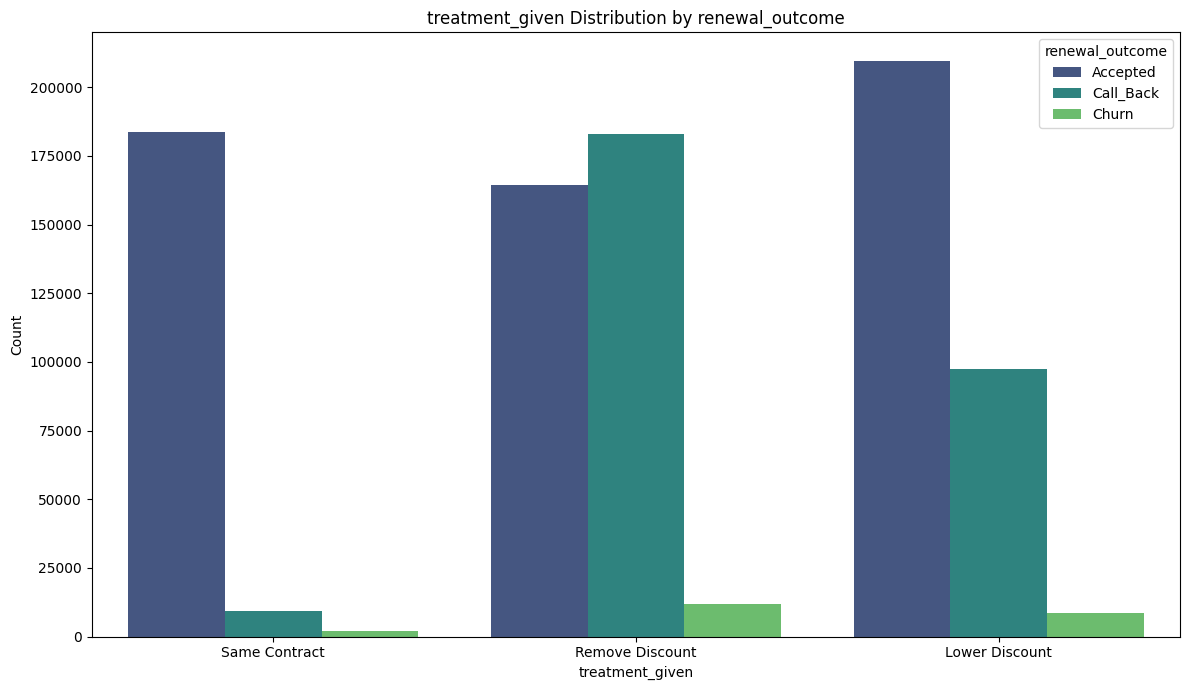

--------------------------------------------------
Plotting cust_tenure vs. renewal_outcome


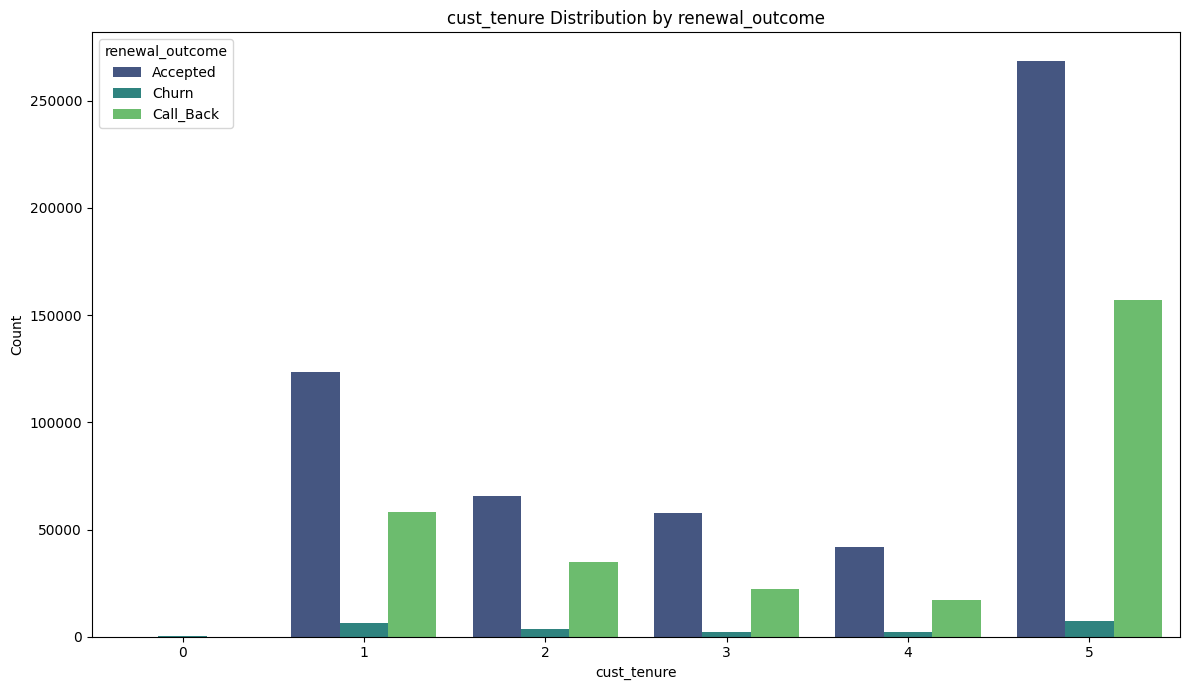

--------------------------------------------------
Plotting years_on_disc vs. renewal_outcome


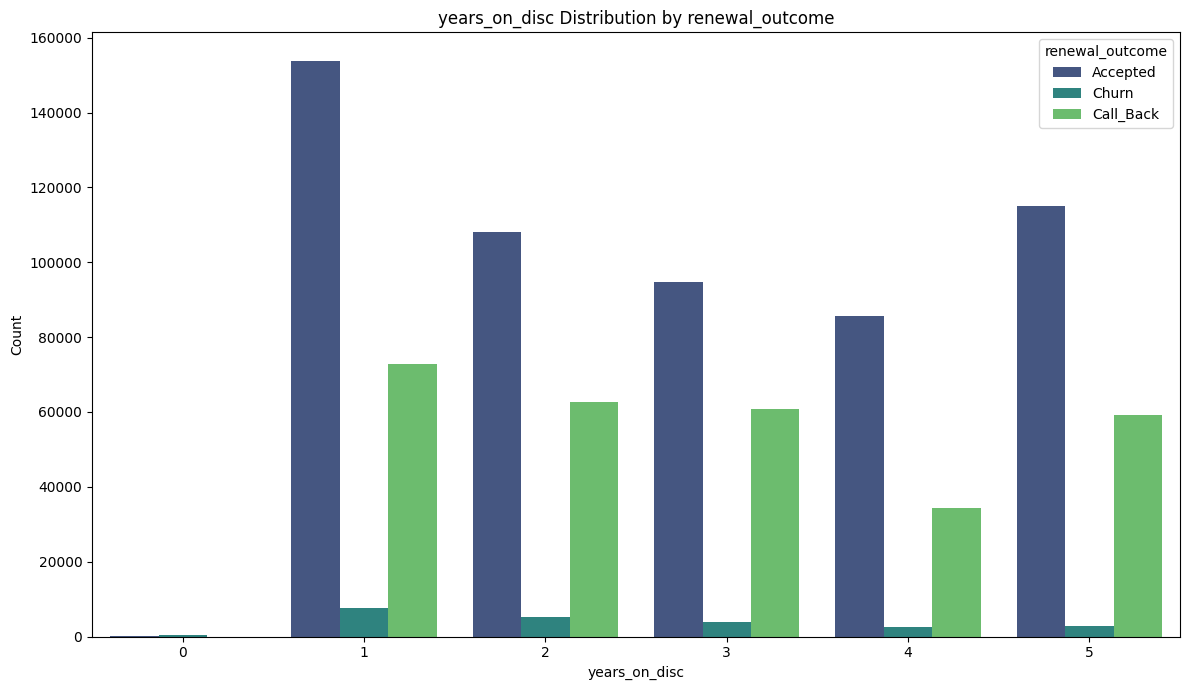

--------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and is already loaded

target_variable = 'renewal_outcome'

numerical_features = [
    'usage',
    'cust_tenure',
    'years_on_disc',
    'before_discount',
    'discount_offered'
]

categorical_features = [
    'state',
    'communication_preference',
    'green',
    'dual_fuel_customer',
    'direct_debit_flag',
    'age',
    'before_channel',
    'renewal_date', # Treat as categorical strings for this plot comparison
    'treatment_given',
    'cust_tenure',
    'years_on_disc'
    # 'renewal_outcome' is the target
    # 'customer_id' is an identifier
]

print("--- Comparing Numerical Features vs. Target (renewal_outcome) ---")

# --- Visualize Numerical Features vs. Target (Box Plots) ---
# Box plots show the distribution (median, quartiles, spread, outliers)
# of the numerical feature for each category of the target variable.
for column in kde_features:
    print(f"Plotting {column} vs. {target_variable}")
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target_variable, y=column, palette='viridis')
    plt.title(f'{column} Distribution by {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()
    print("-" * 50)


print("\n--- Comparing Categorical Features vs. Target (renewal_outcome) ---")

# --- Visualize Categorical Features vs. Target (Count Plots with Hue) ---
# Count plots with hue show the frequency of categories for a feature,
# split by the categories of the target variable.

for column in categorical_features:
    print(f"Plotting {column} vs. {target_variable}")
    plt.figure(figsize=(12, 7)) # Adjust figure size, especially for many categories

    # Create the count plot, splitting the bars by the target variable
    # Using x=column and hue=target_variable is standard for this comparison
    sns.countplot(data=df, x=column, hue=target_variable, palette='viridis')

    plt.title(f'{column} Distribution by {target_variable}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # Rotate x-axis labels if there are too many categories to prevent overlap
    if df[column].nunique() > 10: # You can adjust this threshold
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

    plt.legend(title=target_variable)
    plt.tight_layout()
    plt.show()
    print("-" * 50)

Plotting state vs. renewal_outcome


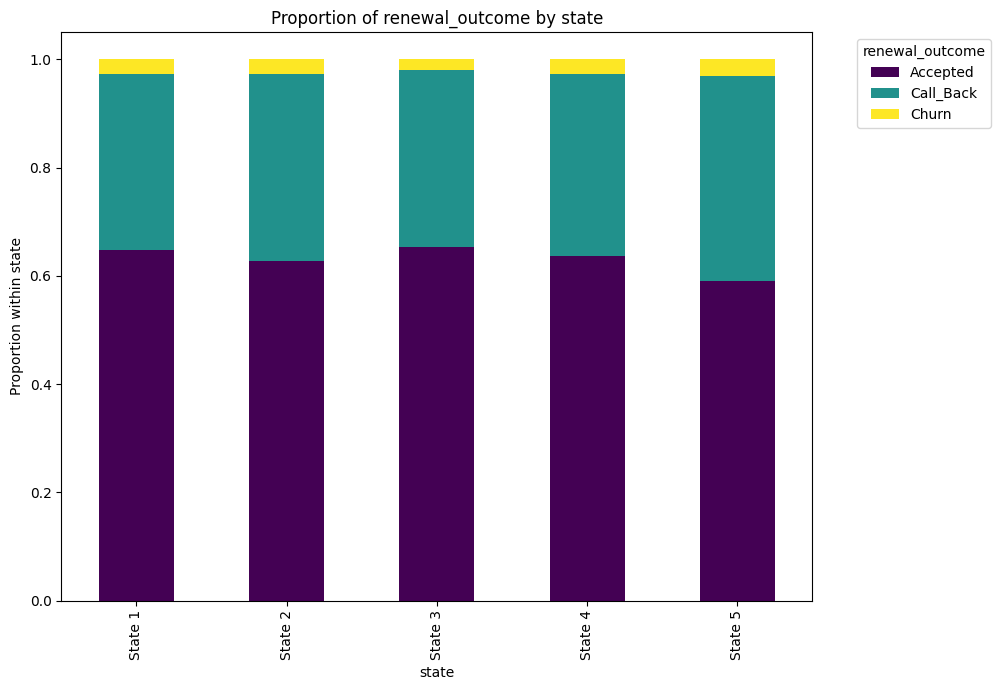

--------------------------------------------------
Plotting communication_preference vs. renewal_outcome


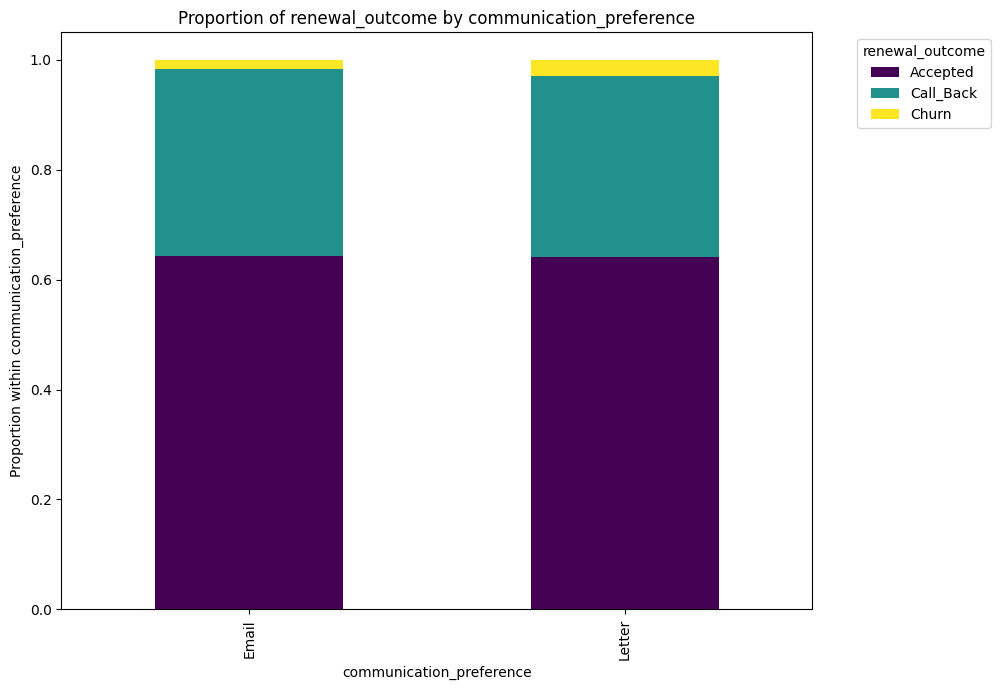

--------------------------------------------------
Plotting green vs. renewal_outcome


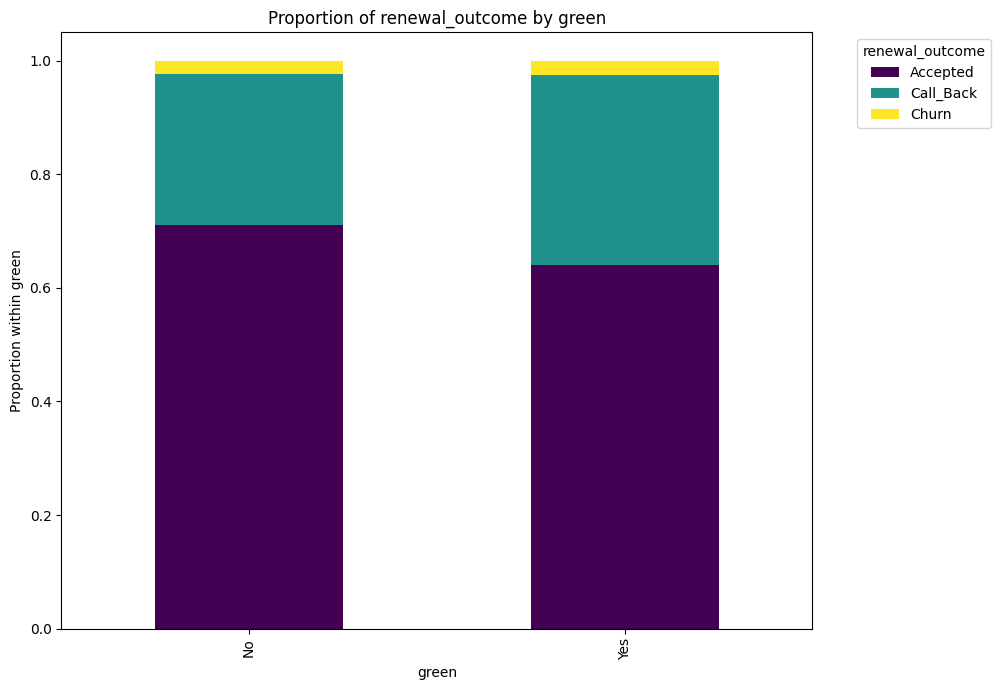

--------------------------------------------------
Plotting dual_fuel_customer vs. renewal_outcome


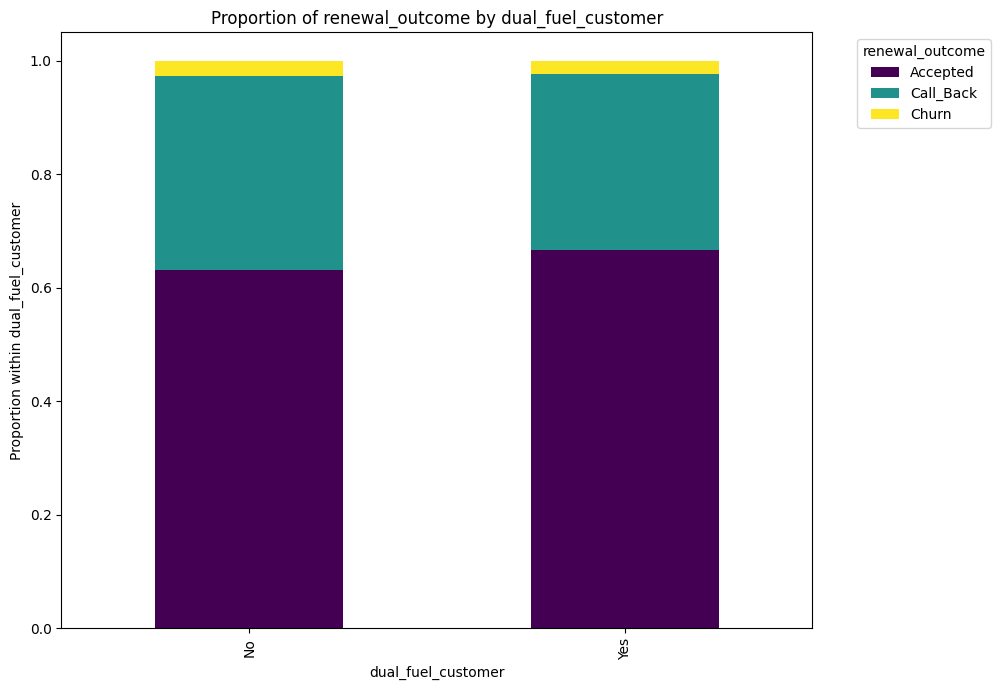

--------------------------------------------------
Plotting direct_debit_flag vs. renewal_outcome


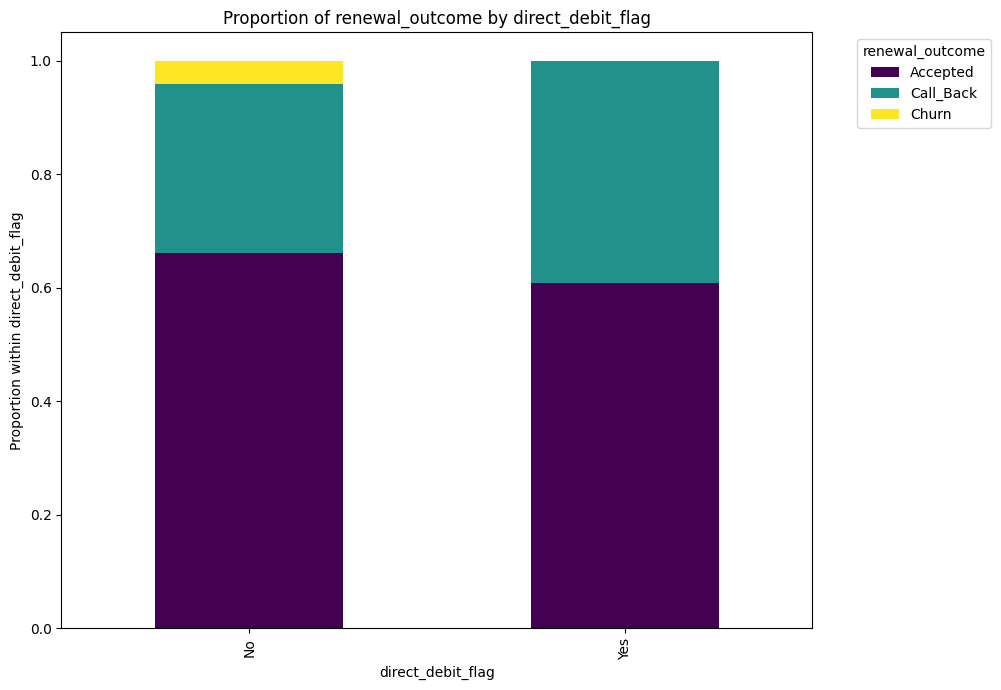

--------------------------------------------------
Plotting age vs. renewal_outcome


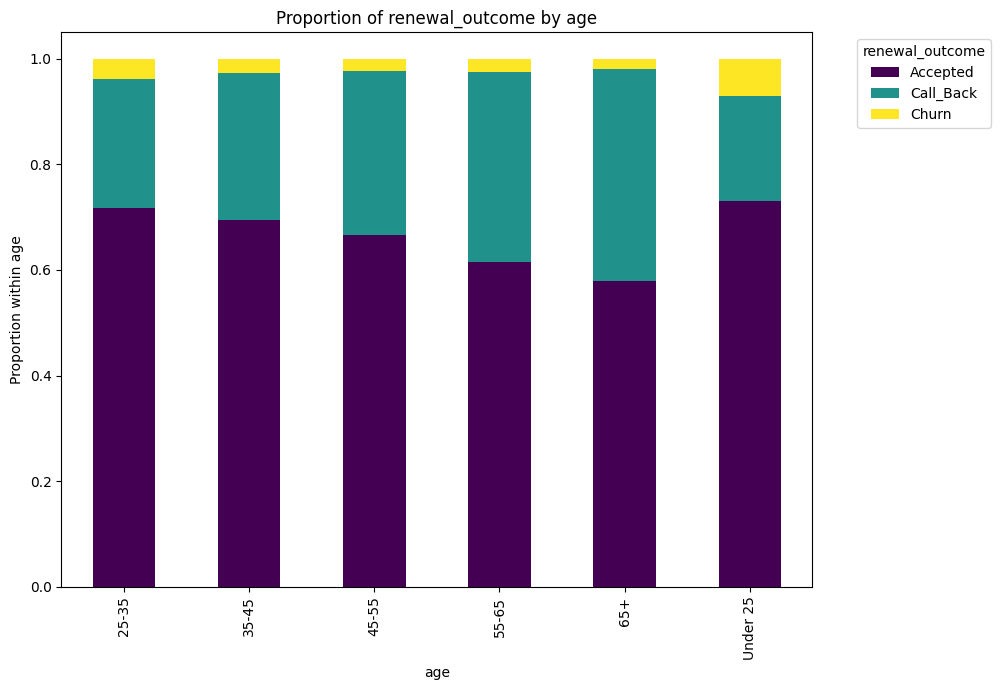

--------------------------------------------------
Plotting before_channel vs. renewal_outcome


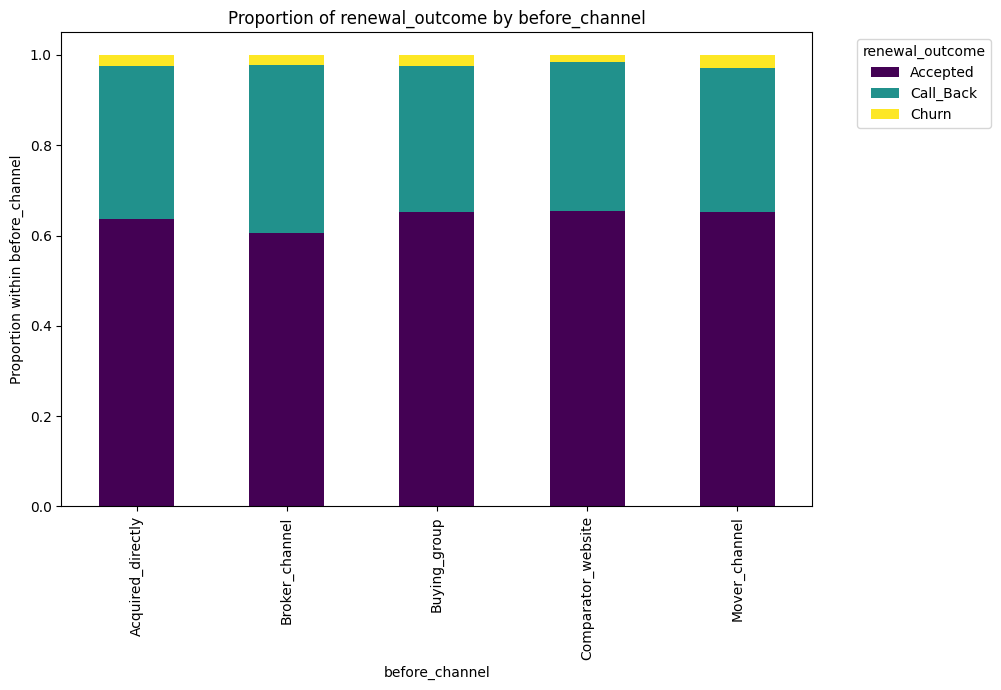

--------------------------------------------------
Plotting renewal_date vs. renewal_outcome


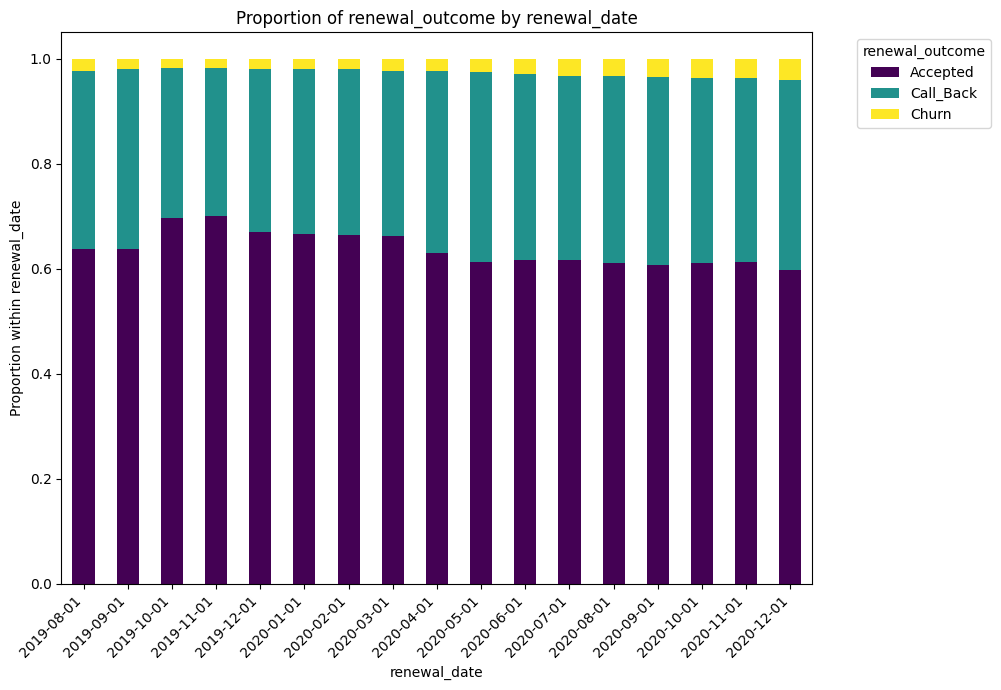

--------------------------------------------------
Plotting treatment_given vs. renewal_outcome


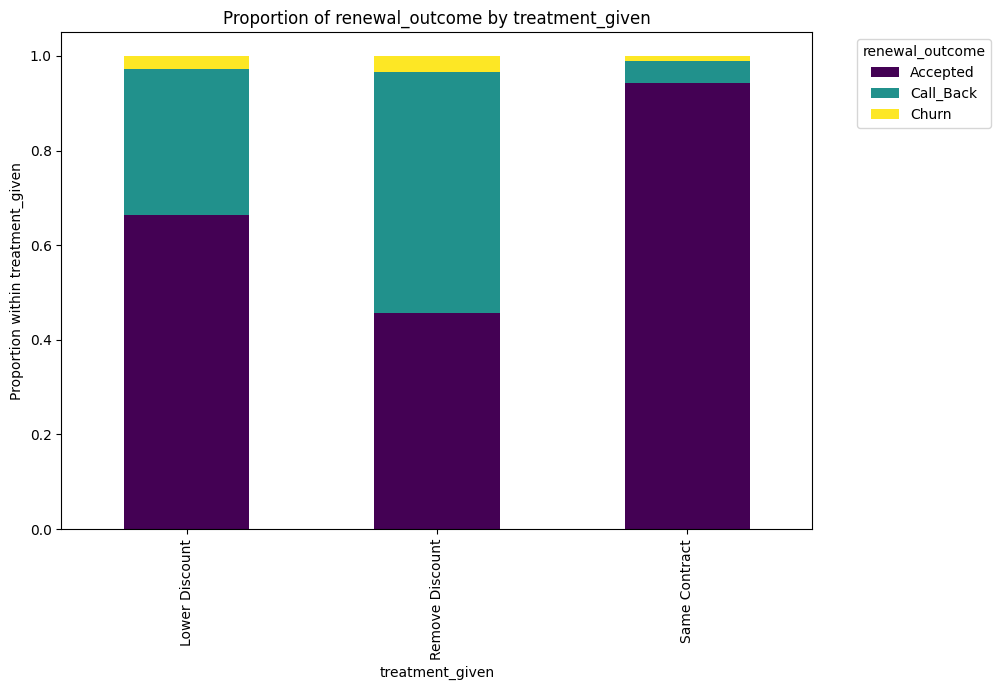

--------------------------------------------------
Plotting cust_tenure vs. renewal_outcome


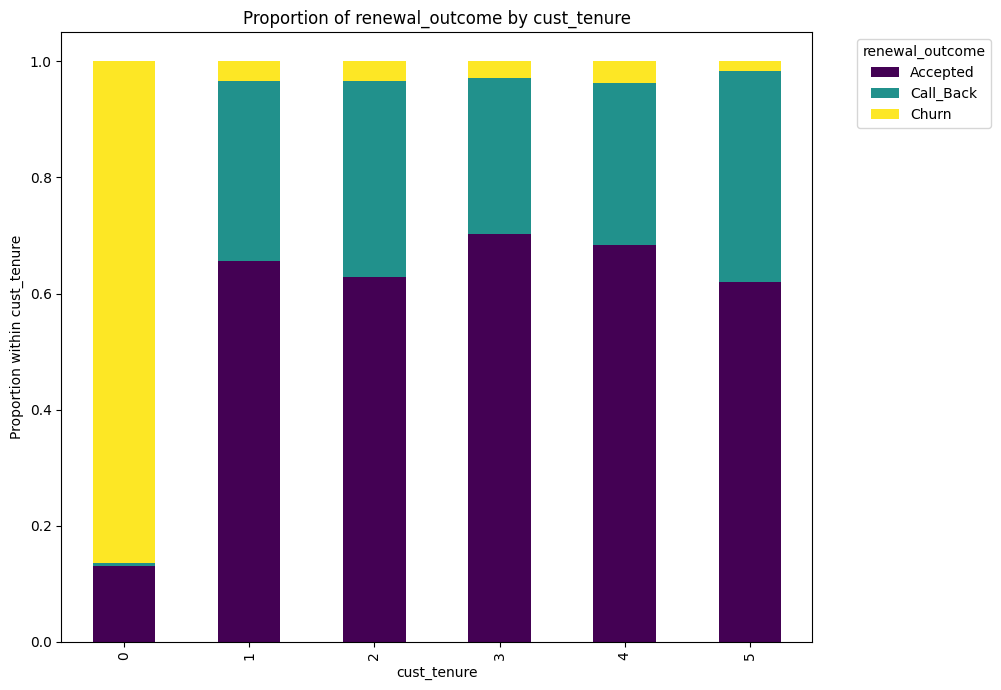

--------------------------------------------------
Plotting years_on_disc vs. renewal_outcome


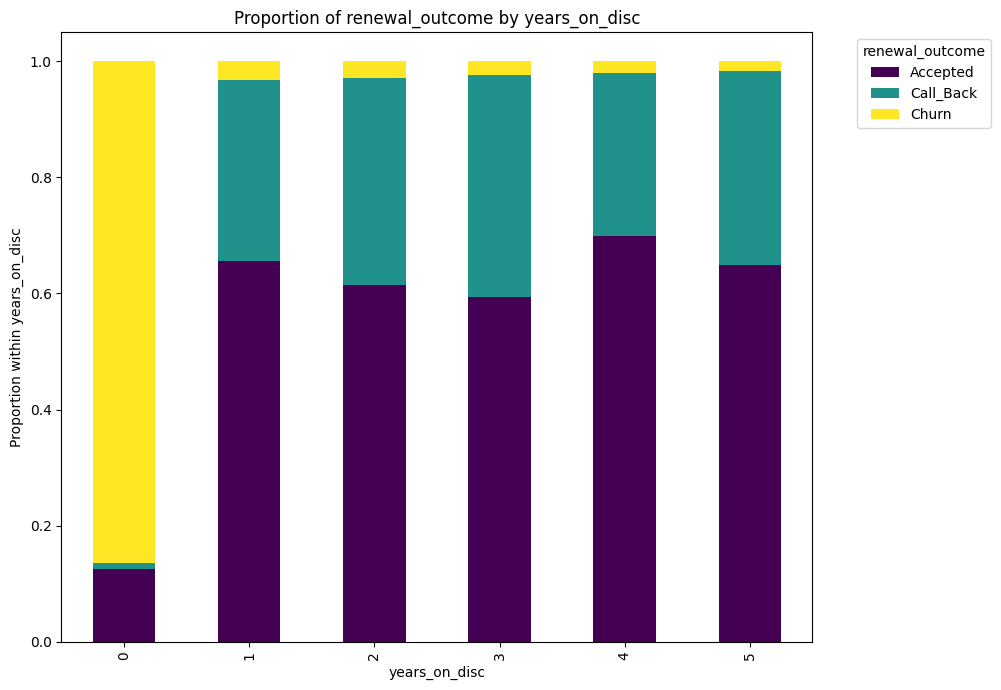

--------------------------------------------------


In [ ]:
for column in categorical_features:
    print(f"Plotting {column} vs. {target_variable}")

    crosstab_props = pd.crosstab(df[column], df[target_variable], normalize='index')

    crosstab_props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis') # Adjust figsize as needed

    plt.title(f'Proportion of {target_variable} by {column}')
    plt.xlabel(column)
    plt.ylabel(f'Proportion within {column}')

    if df[column].nunique() > 10:
        plt.xticks(rotation=45, ha='right')

    plt.legend(title=target_variable, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()
    print("-" * 50)

Correlation Matrix of Numerical Features:
                     usage  cust_tenure  years_on_disc  before_discount  \
usage             1.000000     0.056778       0.007768         0.097110   
cust_tenure       0.056778     1.000000       0.752669         0.034041   
years_on_disc     0.007768     0.752669       1.000000         0.083627   
before_discount   0.097110     0.034041       0.083627         1.000000   
discount_offered  0.042729     0.181887       0.316443         0.371247   

                  discount_offered  
usage                     0.042729  
cust_tenure               0.181887  
years_on_disc             0.316443  
before_discount           0.371247  
discount_offered          1.000000  


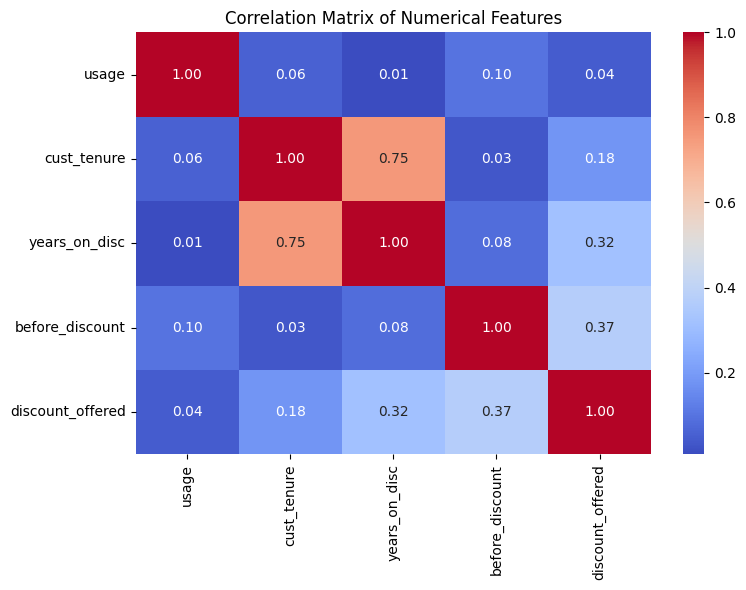

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

numerical_features = [
    'usage',
    'cust_tenure',
    'years_on_disc',
    'before_discount',
    'discount_offered'
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

print("Correlation Matrix of Numerical Features:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

--- Stacked Bar Plots Between Categorical Variables ---
Generating plots for 36 unique pairs.

Plotting Proportion of 'communication_preference' by 'state'


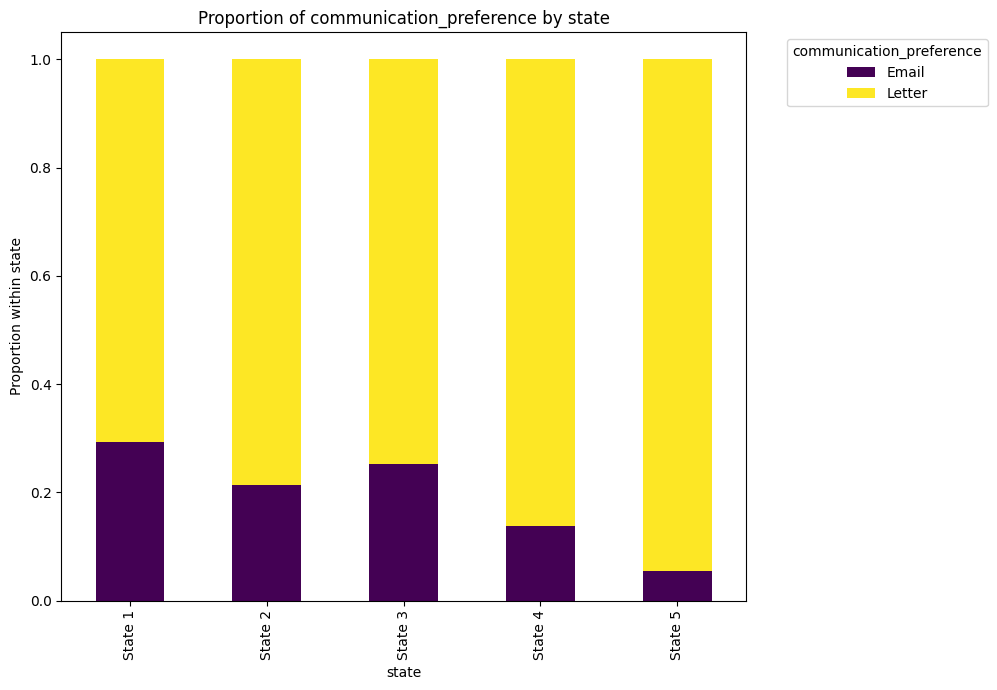

--------------------------------------------------

Plotting Proportion of 'green' by 'state'


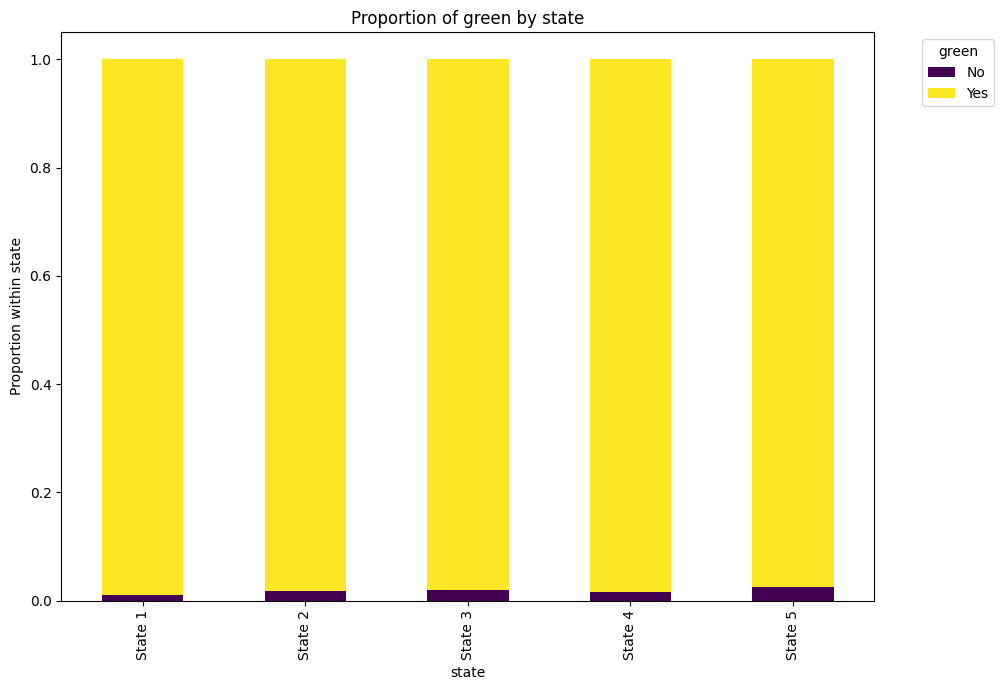

--------------------------------------------------

Plotting Proportion of 'dual_fuel_customer' by 'state'


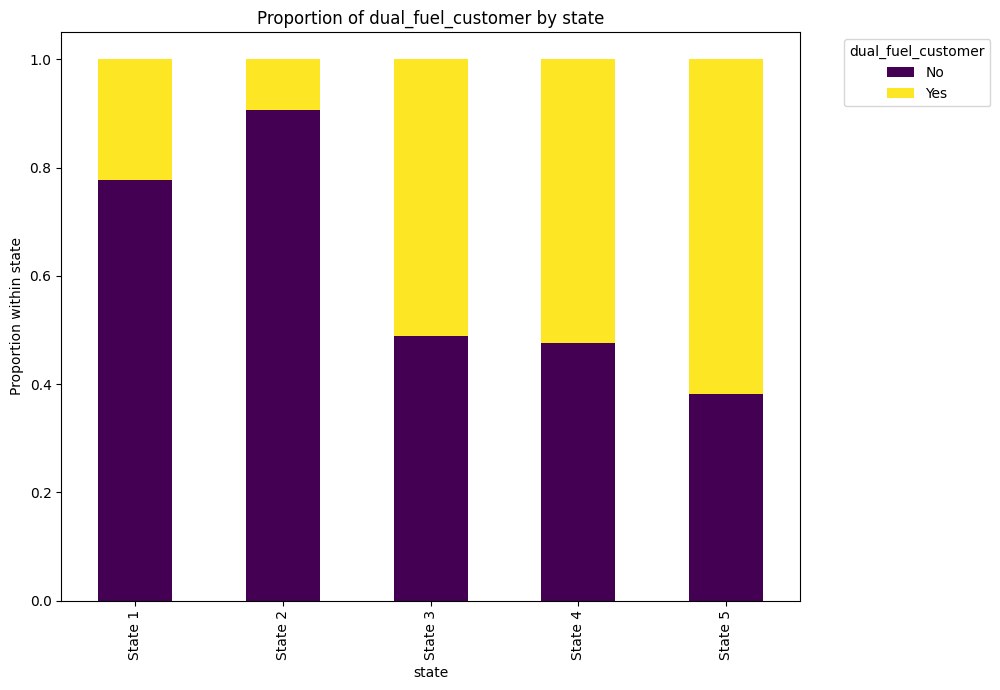

--------------------------------------------------

Plotting Proportion of 'direct_debit_flag' by 'state'


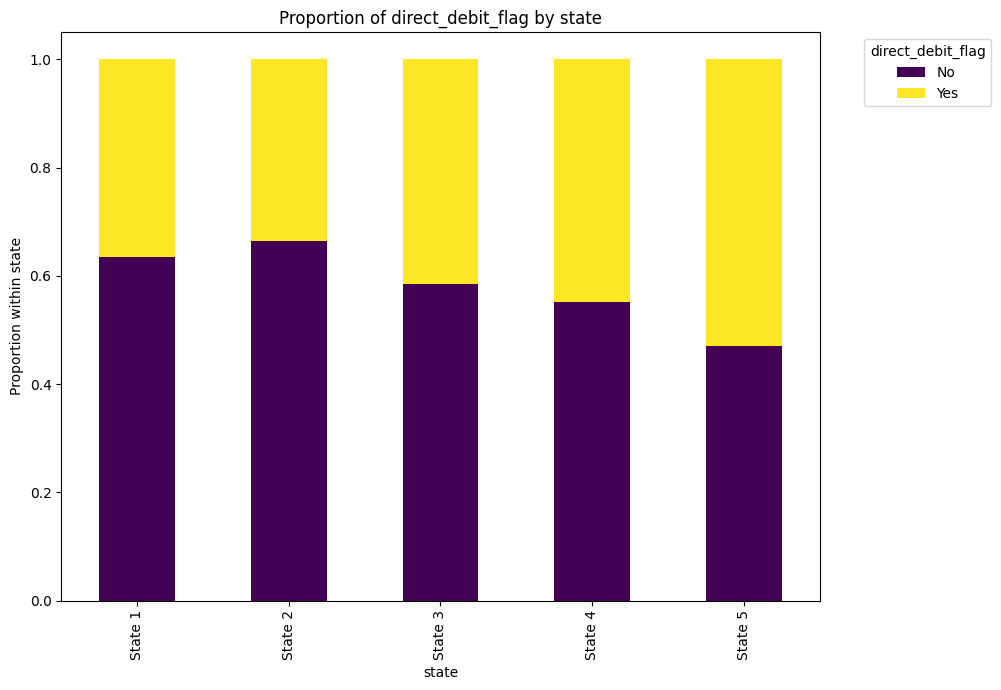

--------------------------------------------------

Plotting Proportion of 'age' by 'state'


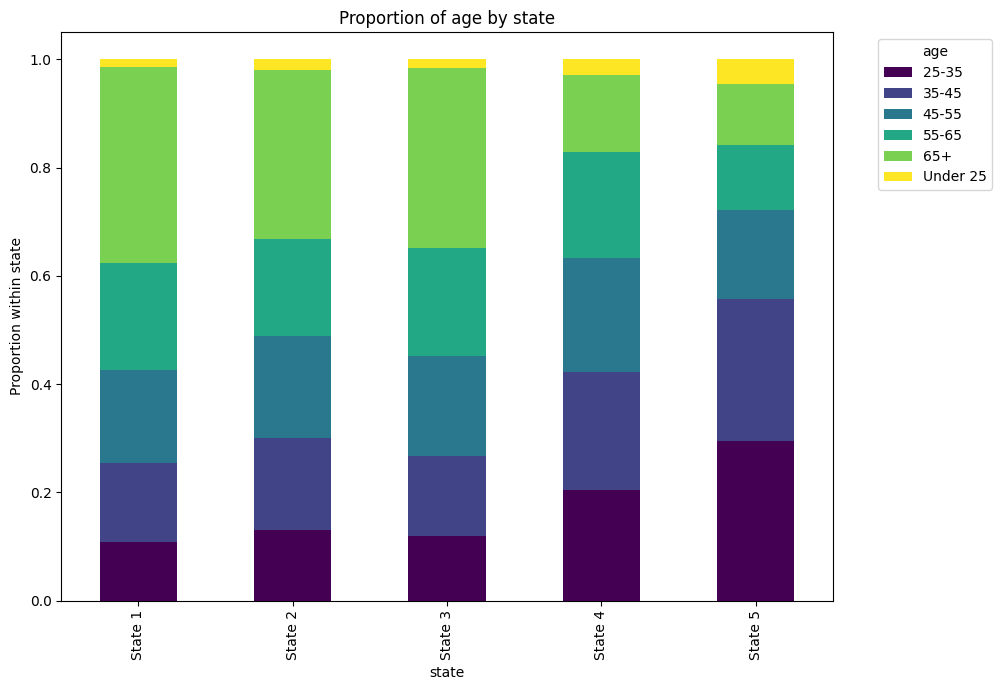

--------------------------------------------------

Plotting Proportion of 'before_channel' by 'state'


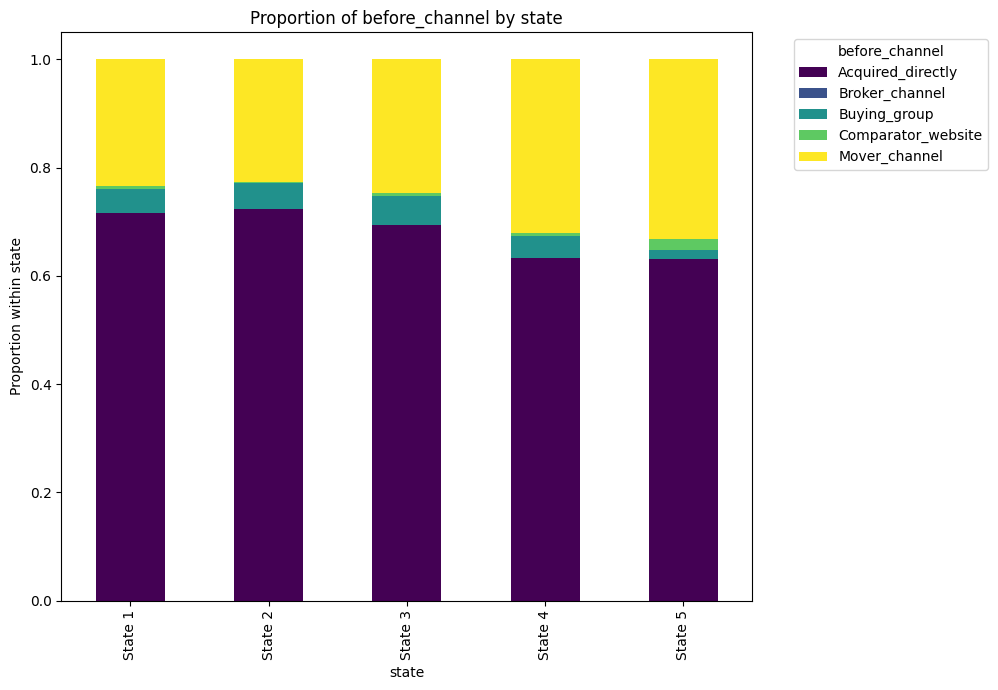

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'state'


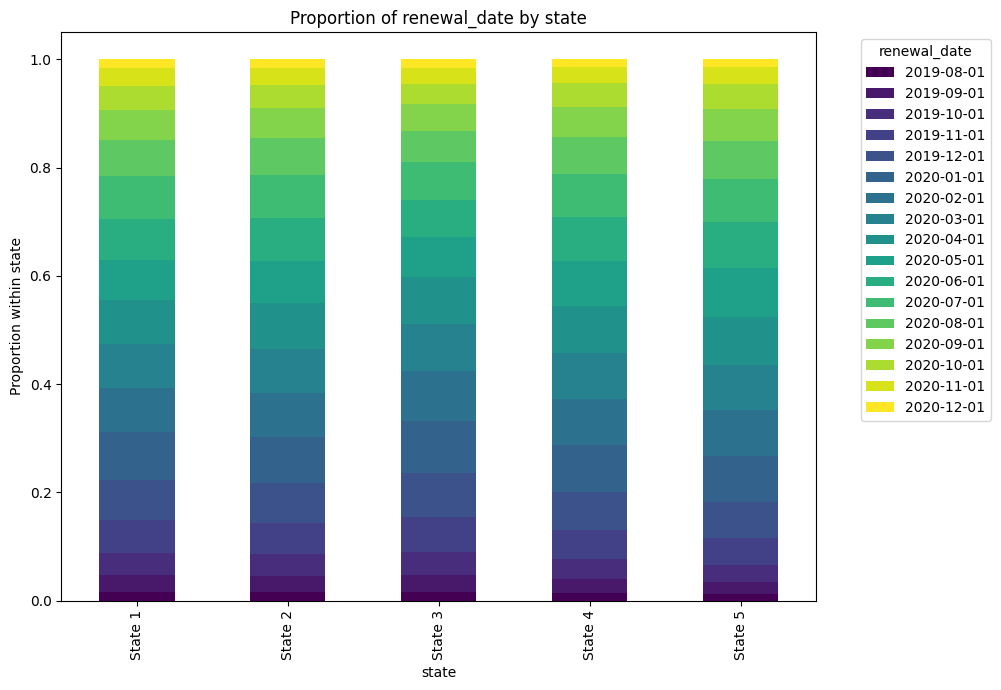

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'state'


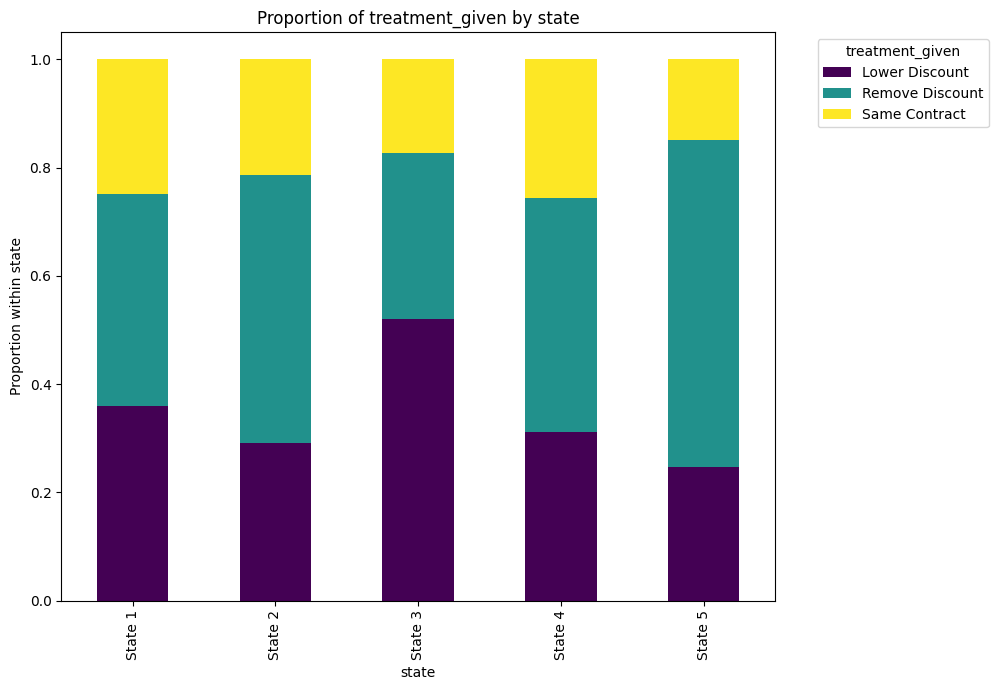

--------------------------------------------------

Plotting Proportion of 'green' by 'communication_preference'


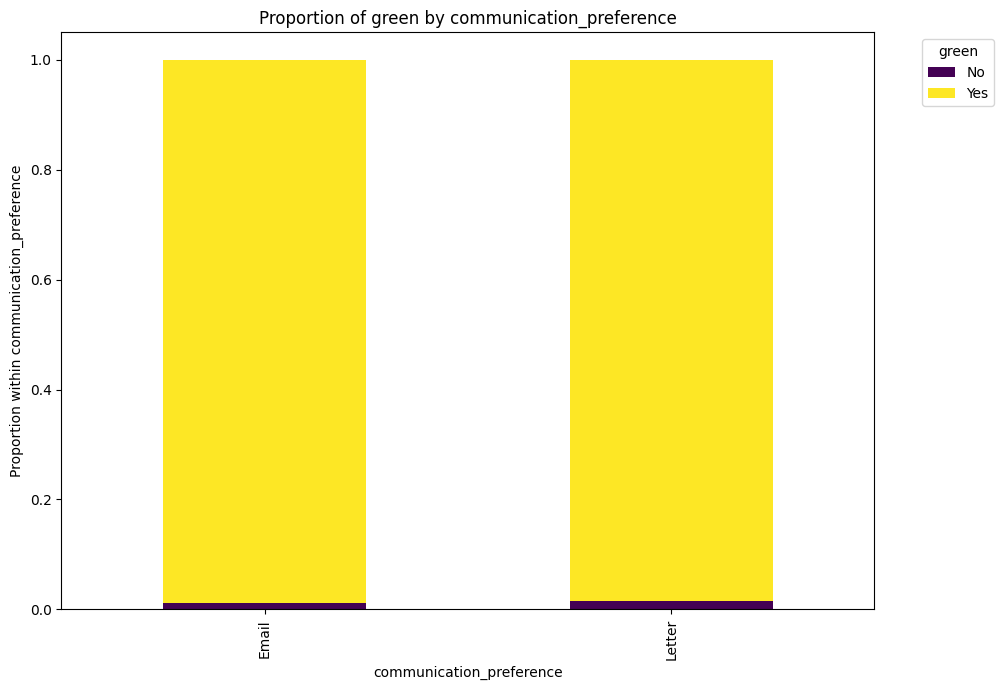

--------------------------------------------------

Plotting Proportion of 'dual_fuel_customer' by 'communication_preference'


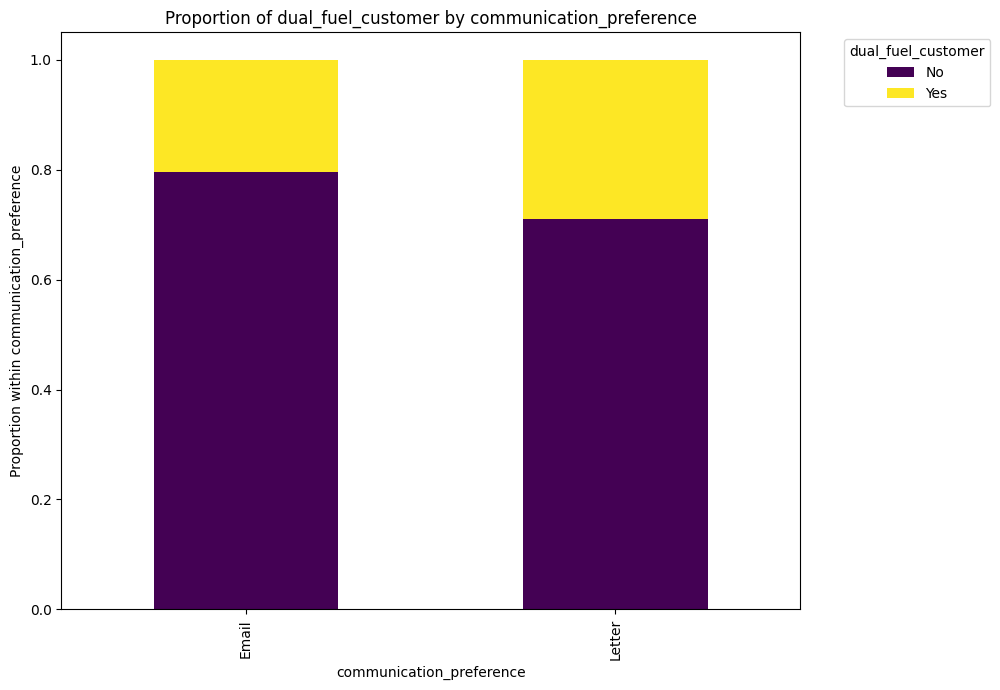

--------------------------------------------------

Plotting Proportion of 'direct_debit_flag' by 'communication_preference'


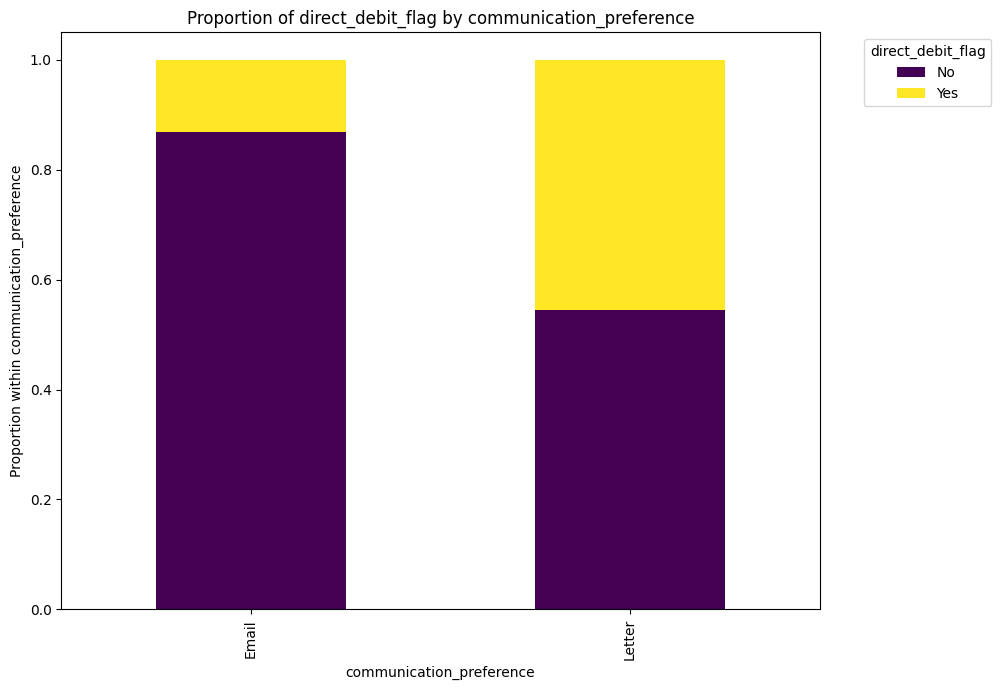

--------------------------------------------------

Plotting Proportion of 'age' by 'communication_preference'


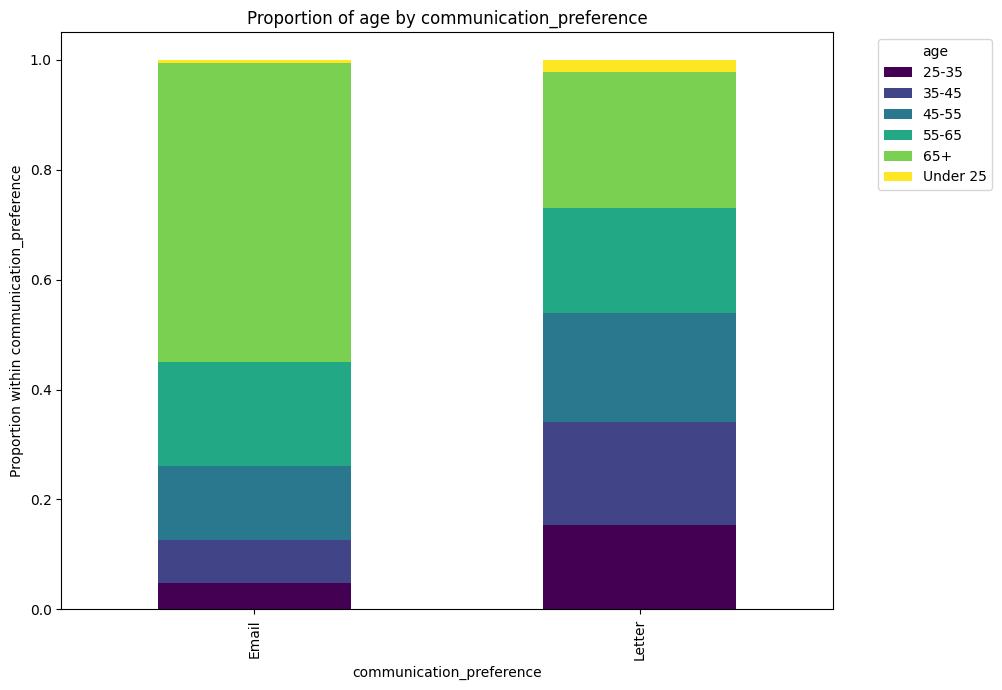

--------------------------------------------------

Plotting Proportion of 'before_channel' by 'communication_preference'


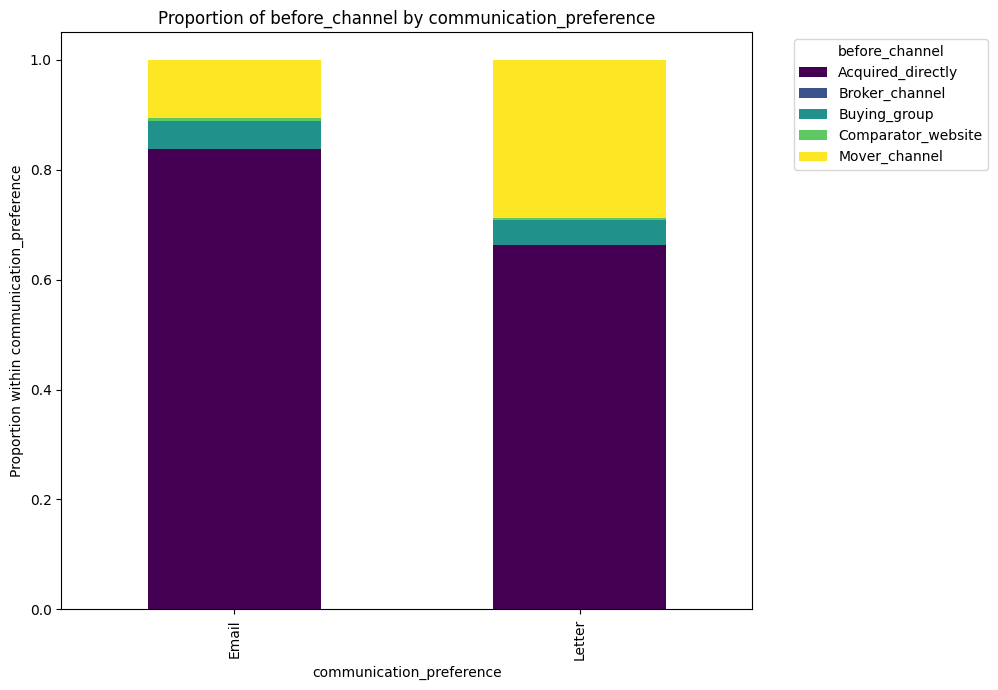

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'communication_preference'


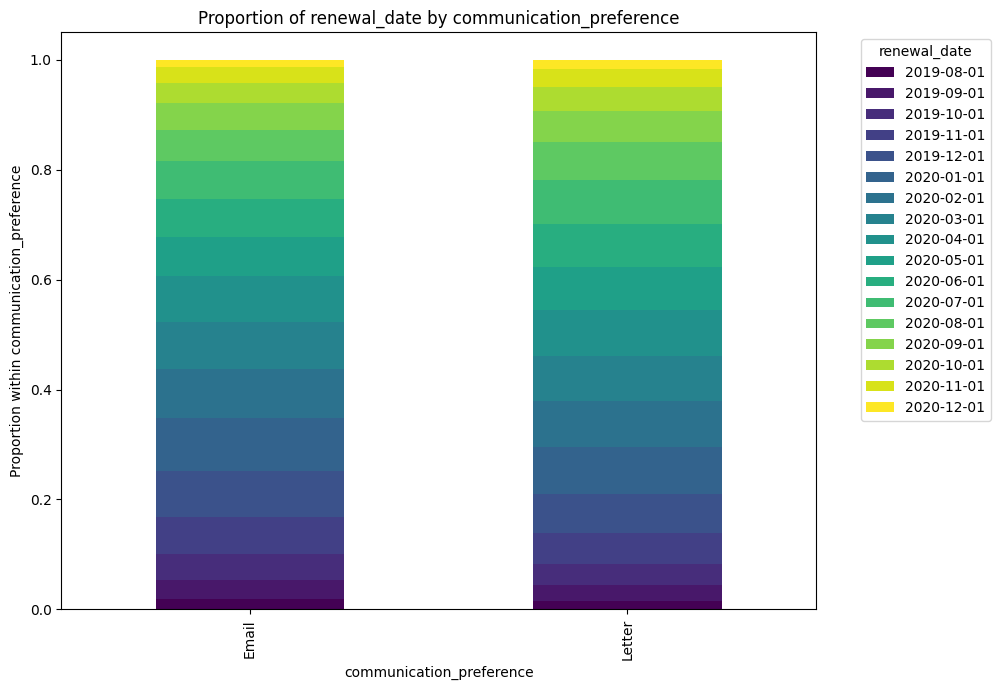

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'communication_preference'


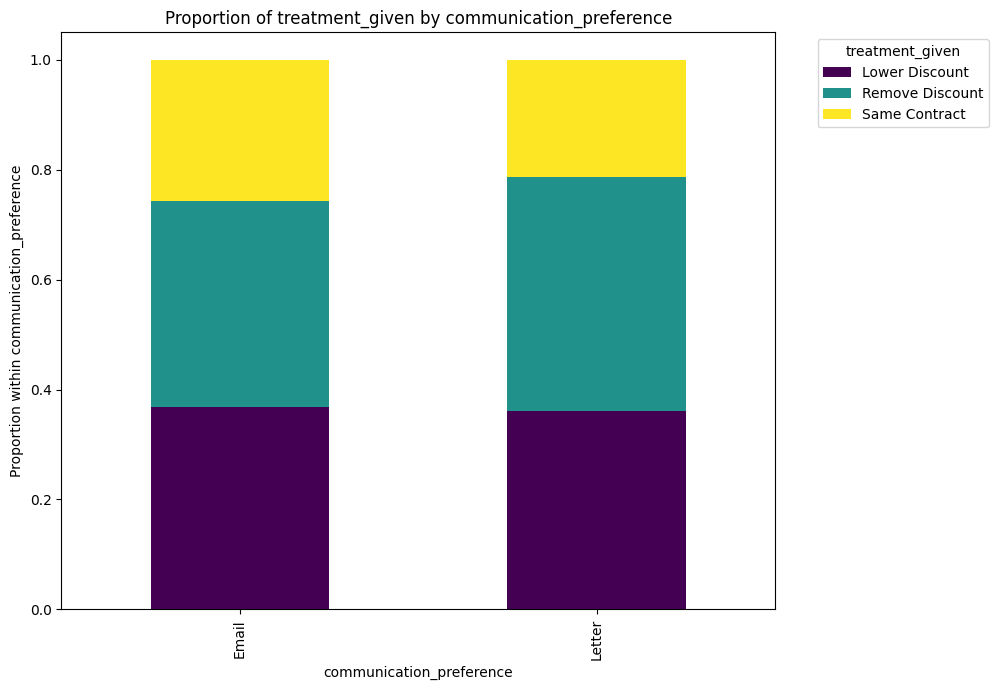

--------------------------------------------------

Plotting Proportion of 'dual_fuel_customer' by 'green'


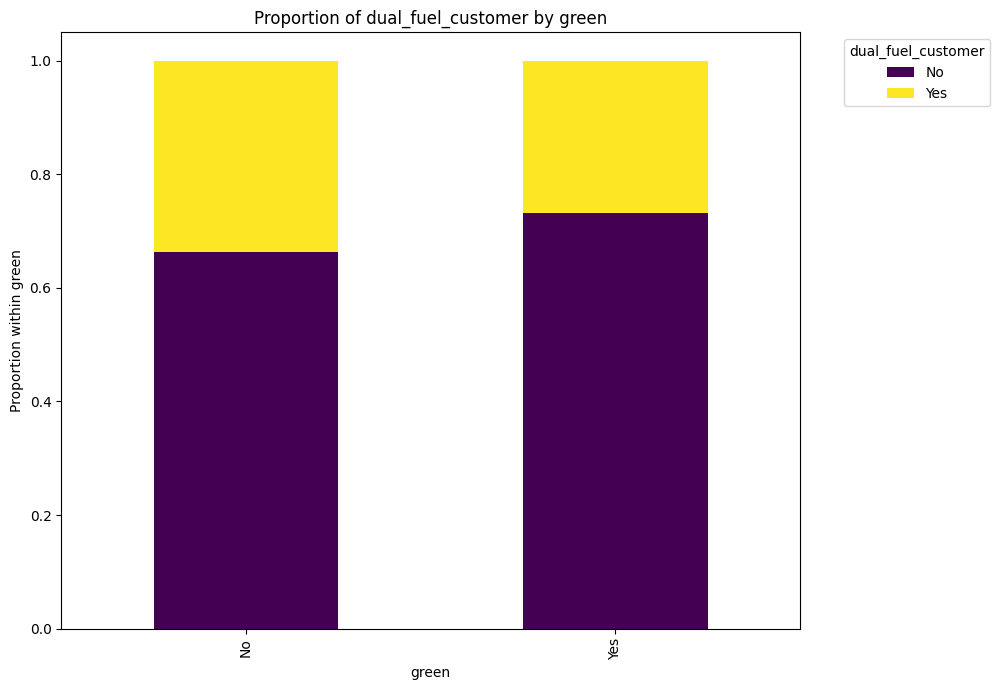

--------------------------------------------------

Plotting Proportion of 'direct_debit_flag' by 'green'


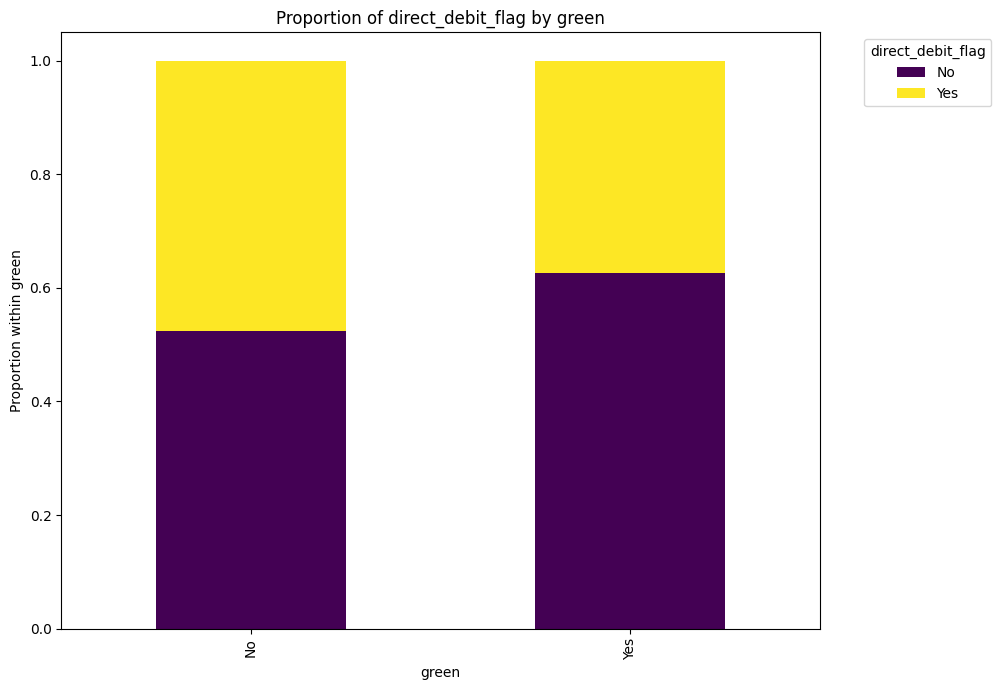

--------------------------------------------------

Plotting Proportion of 'age' by 'green'


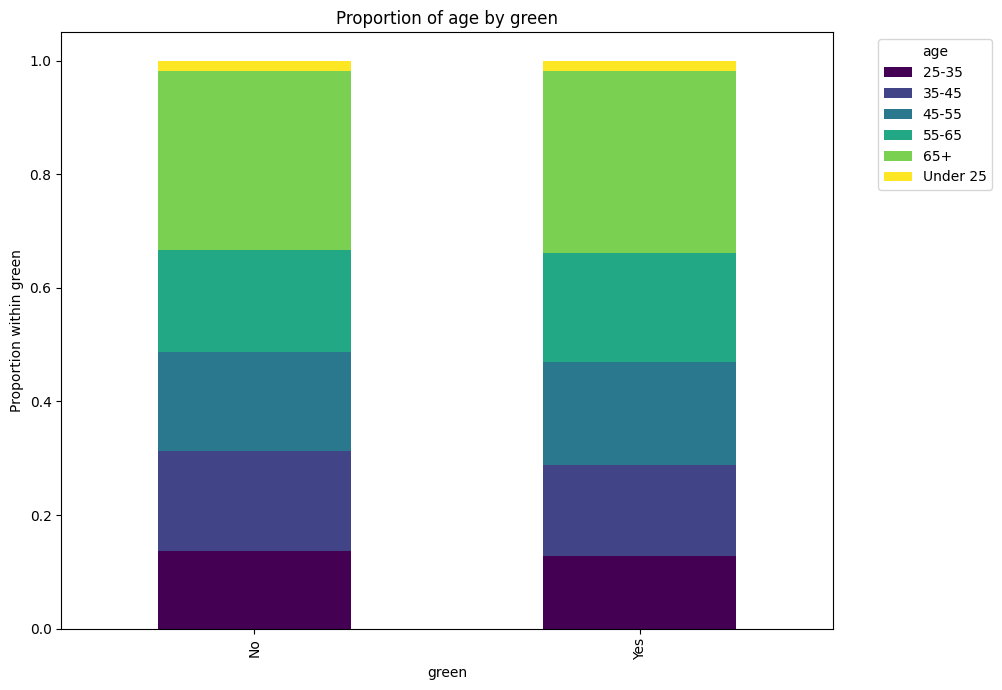

--------------------------------------------------

Plotting Proportion of 'before_channel' by 'green'


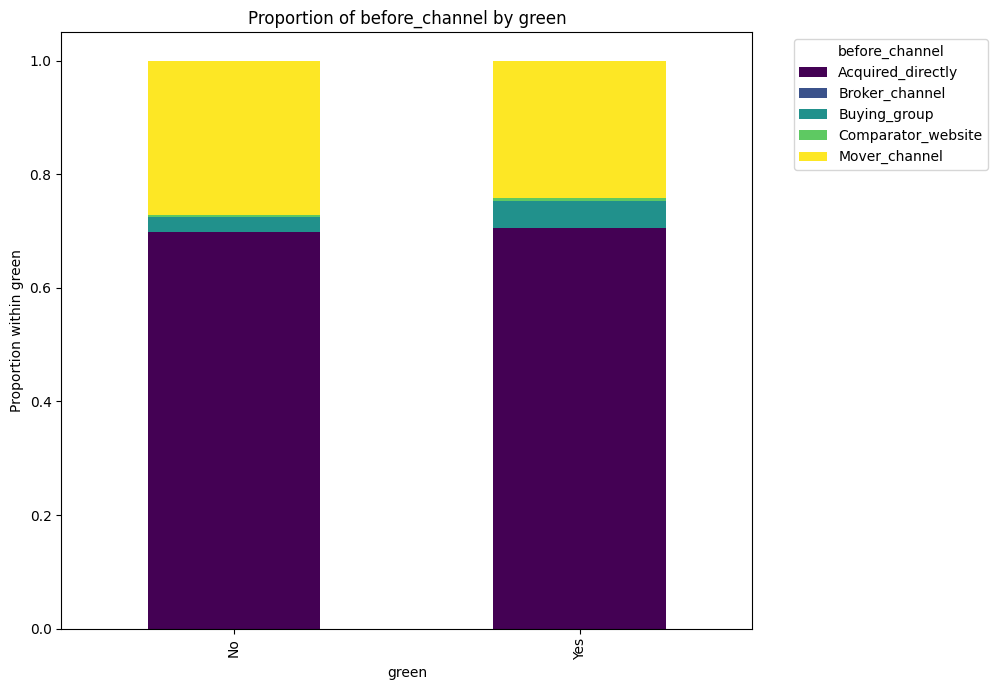

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'green'


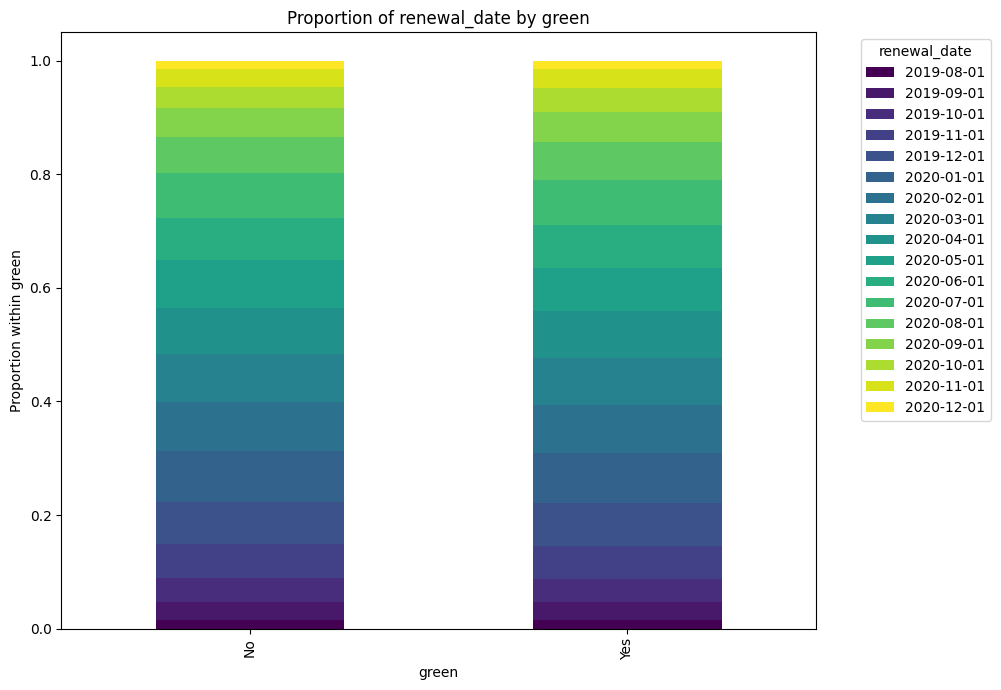

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'green'


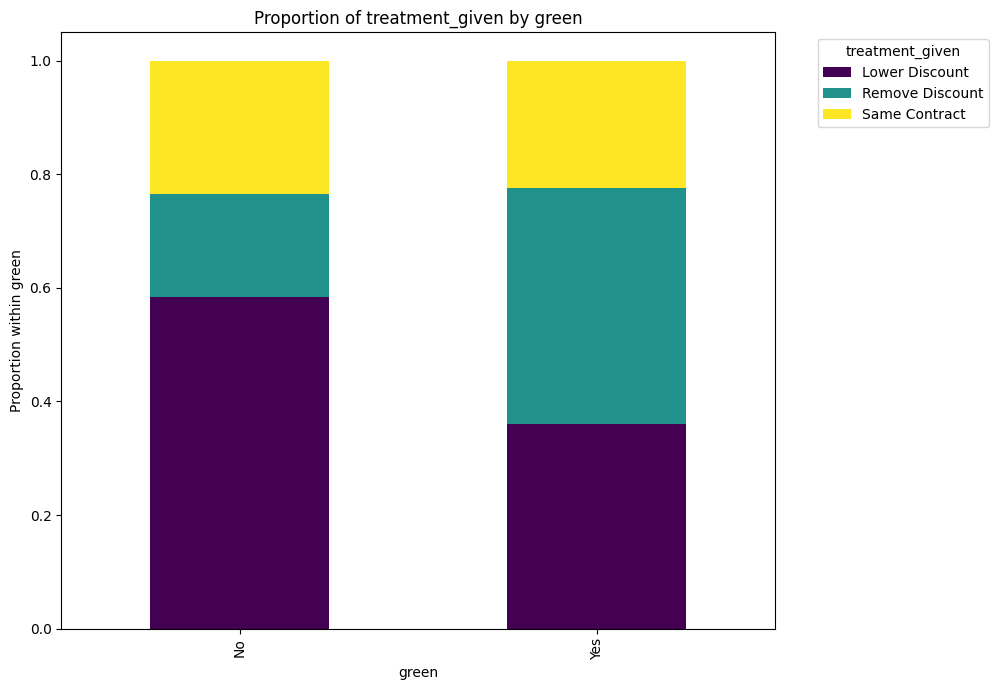

--------------------------------------------------

Plotting Proportion of 'direct_debit_flag' by 'dual_fuel_customer'


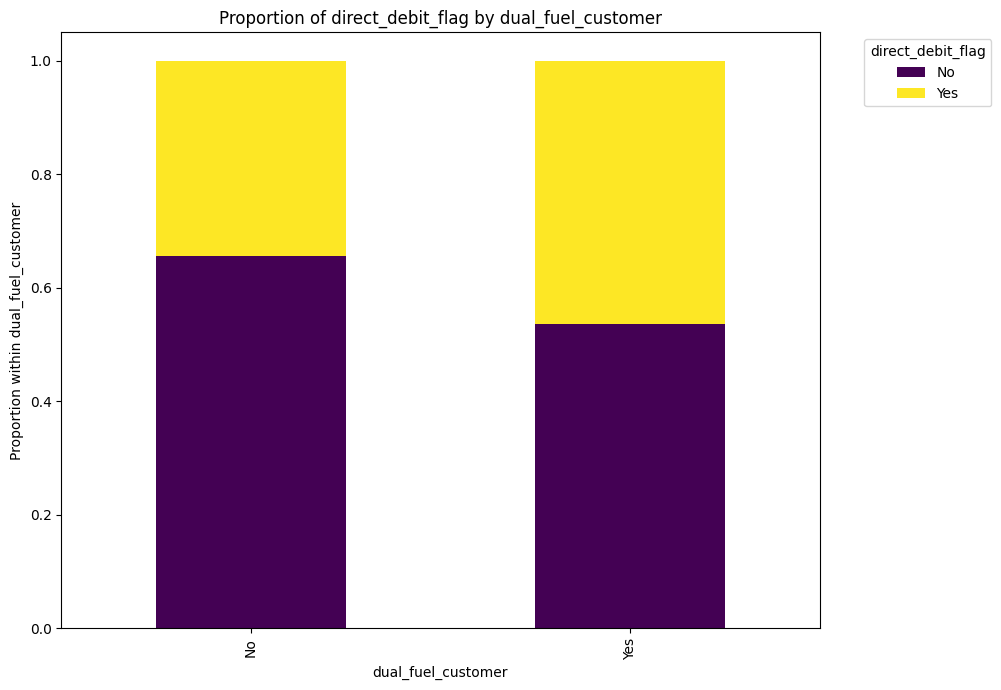

--------------------------------------------------

Plotting Proportion of 'age' by 'dual_fuel_customer'


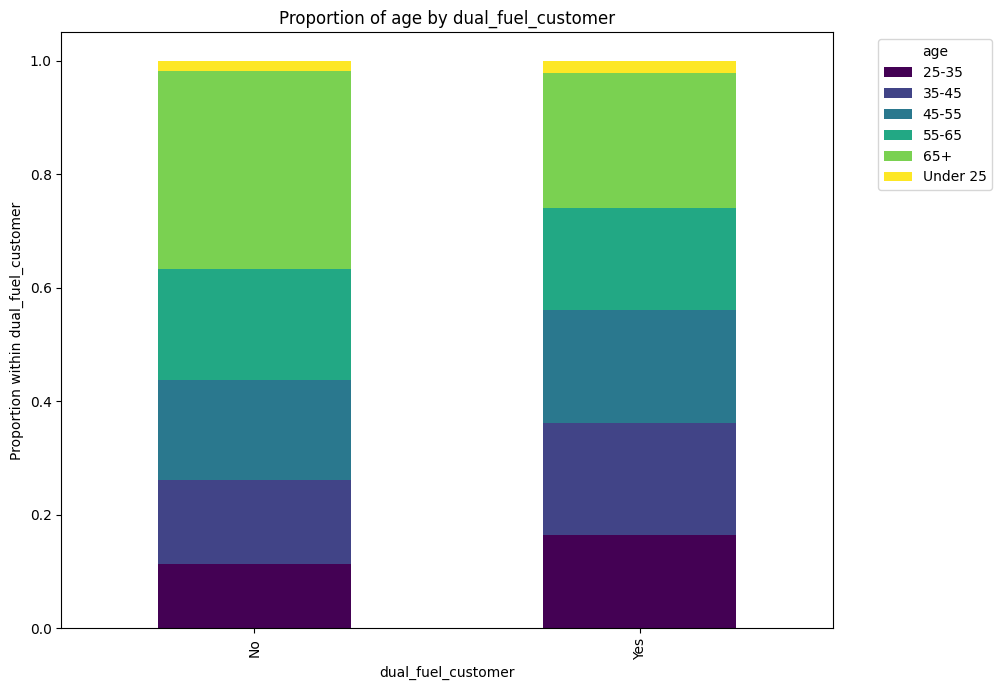

--------------------------------------------------

Plotting Proportion of 'before_channel' by 'dual_fuel_customer'


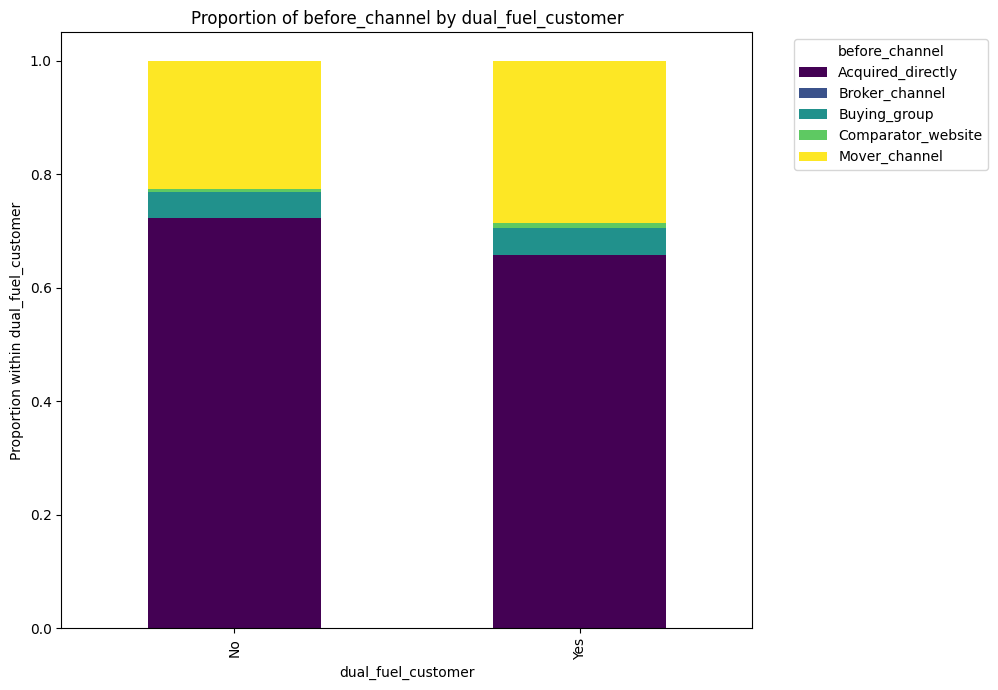

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'dual_fuel_customer'


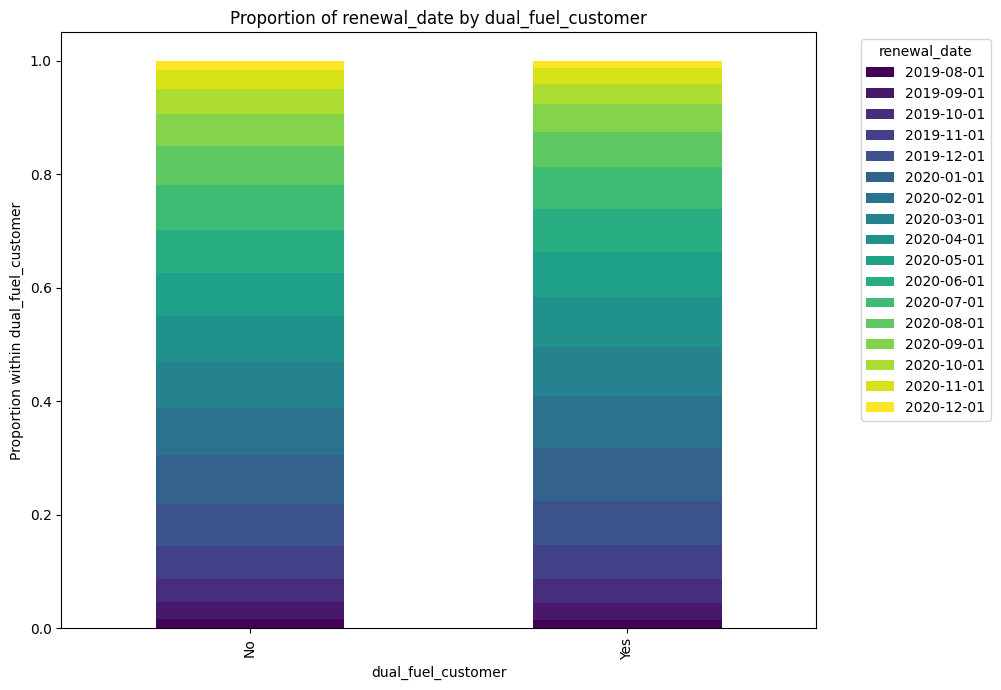

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'dual_fuel_customer'


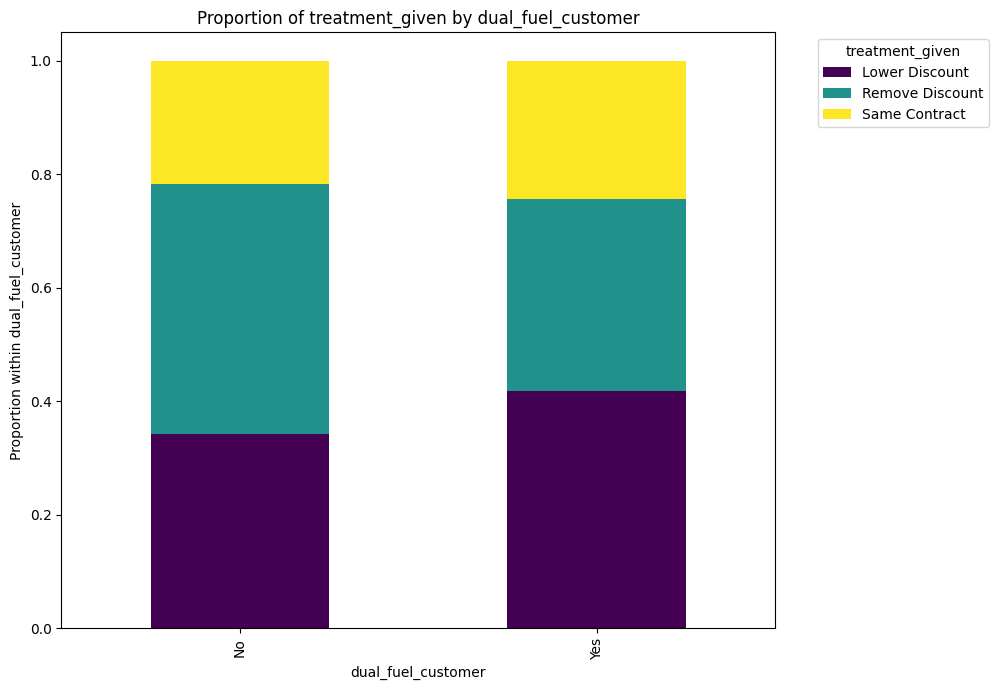

--------------------------------------------------

Plotting Proportion of 'age' by 'direct_debit_flag'


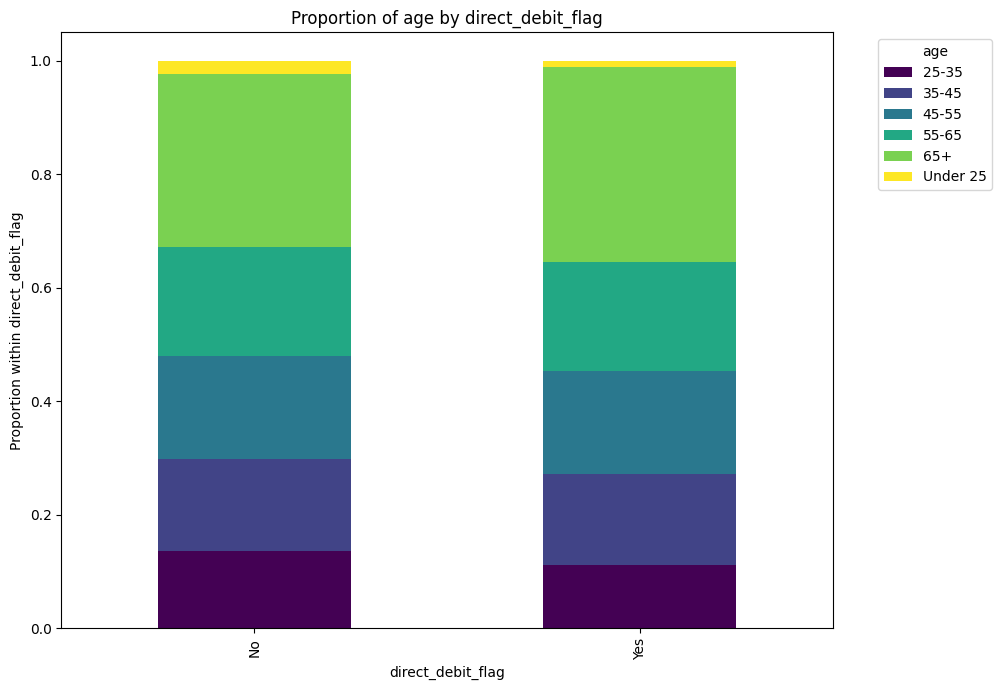

--------------------------------------------------

Plotting Proportion of 'before_channel' by 'direct_debit_flag'


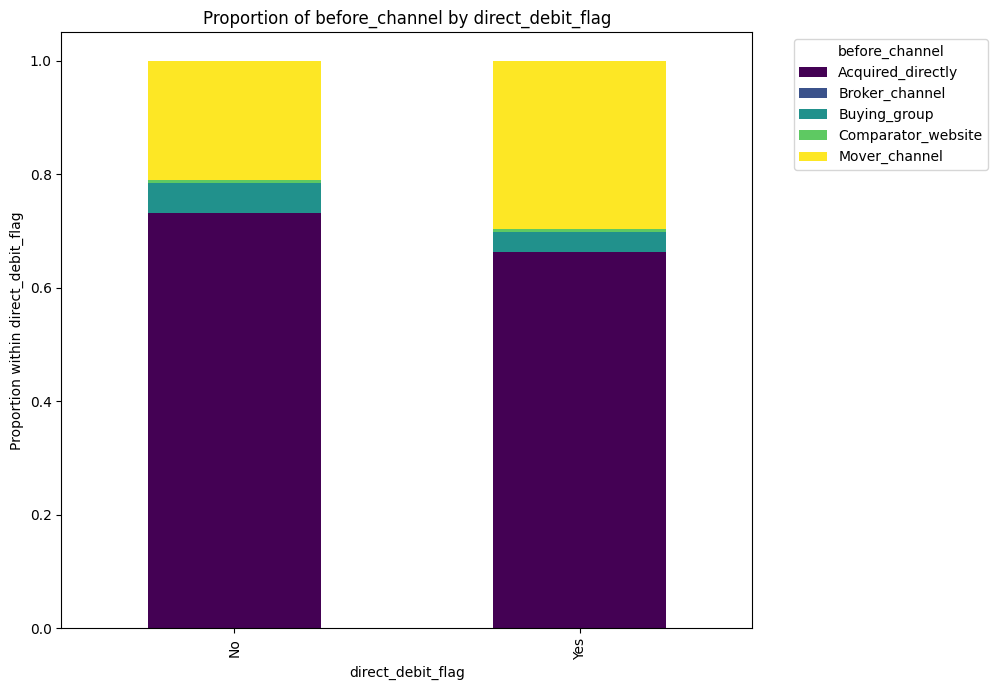

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'direct_debit_flag'


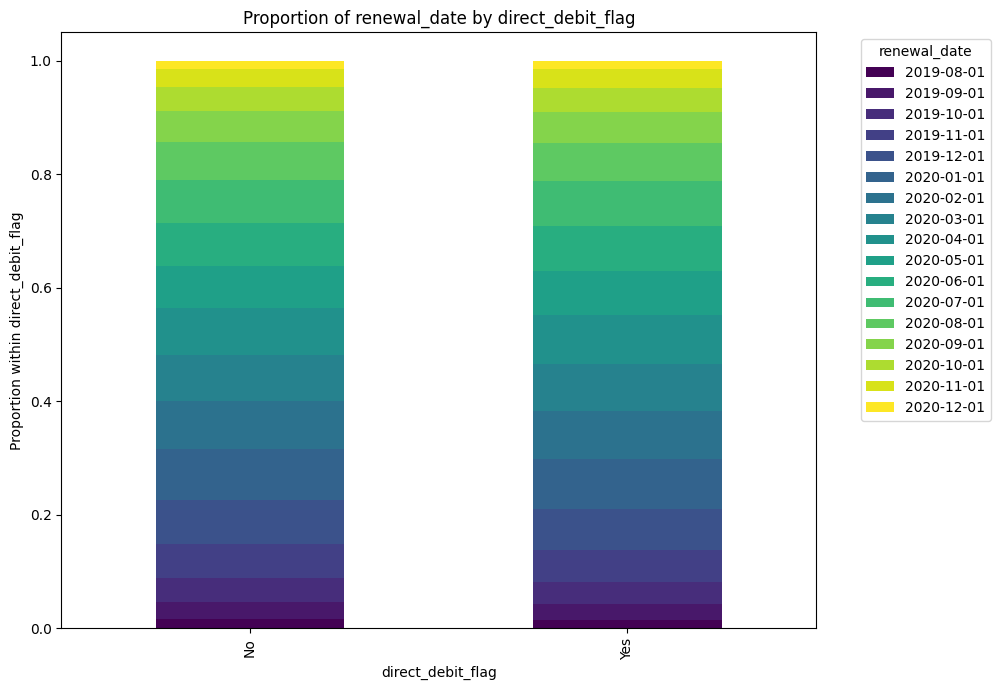

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'direct_debit_flag'


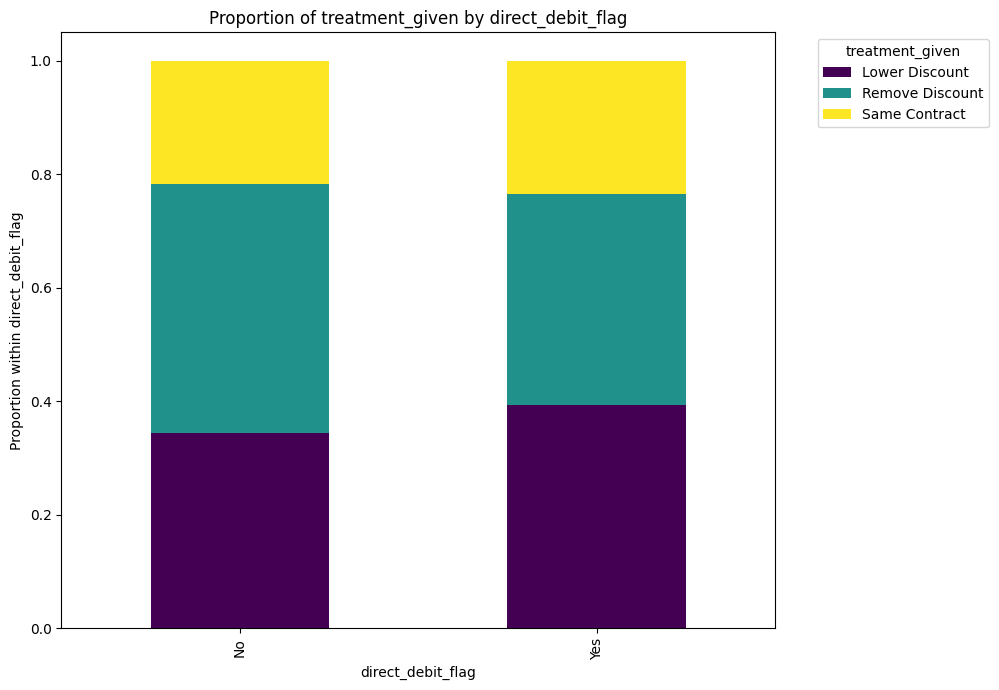

--------------------------------------------------

Plotting Proportion of 'before_channel' by 'age'


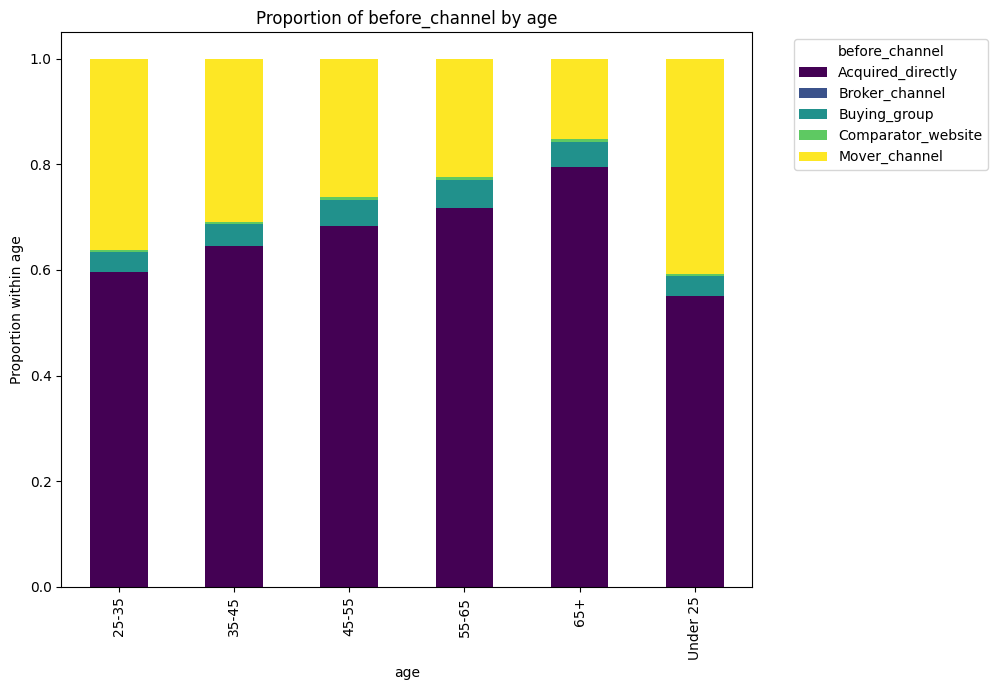

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'age'


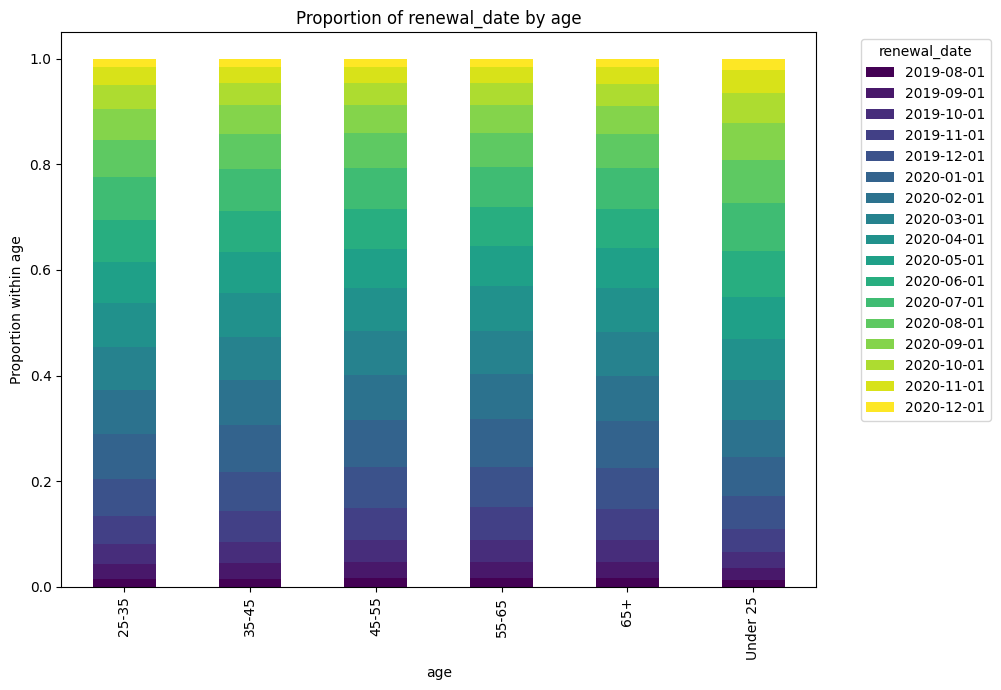

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'age'


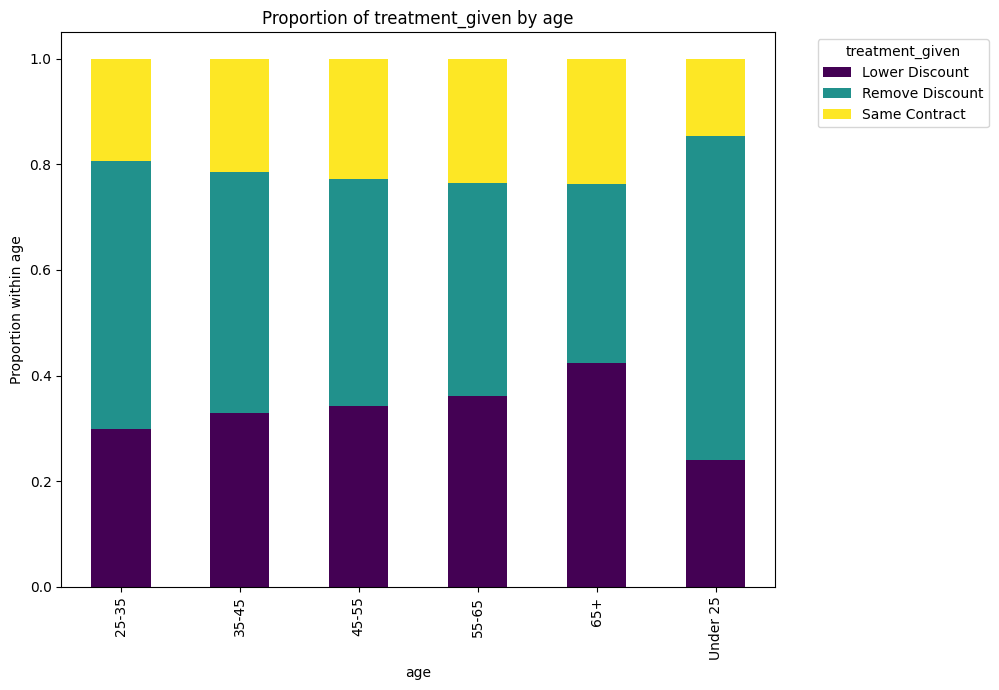

--------------------------------------------------

Plotting Proportion of 'renewal_date' by 'before_channel'


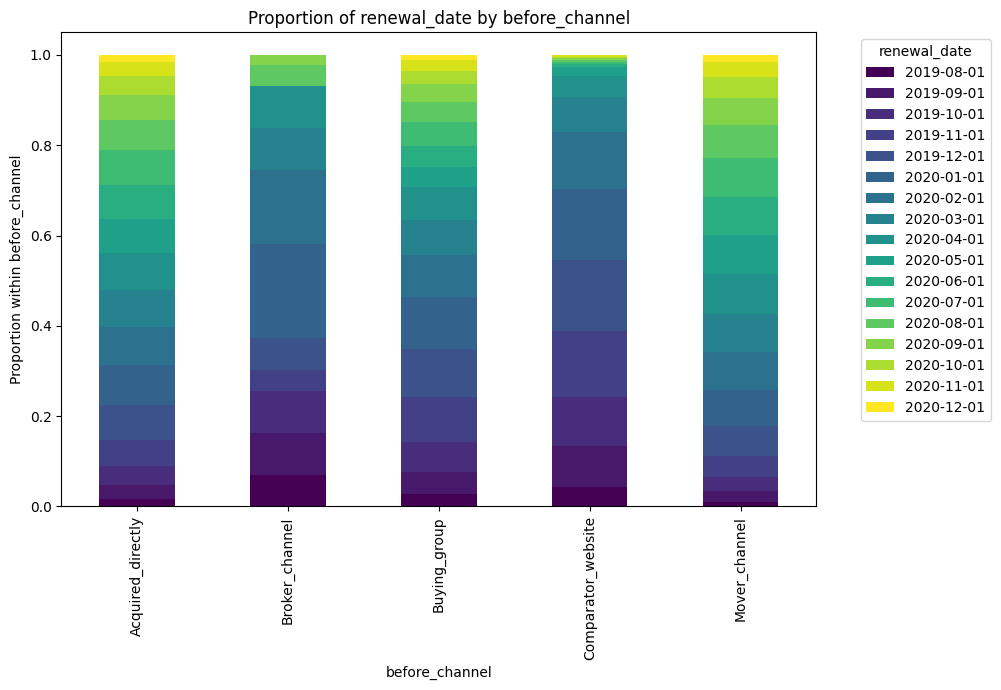

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'before_channel'


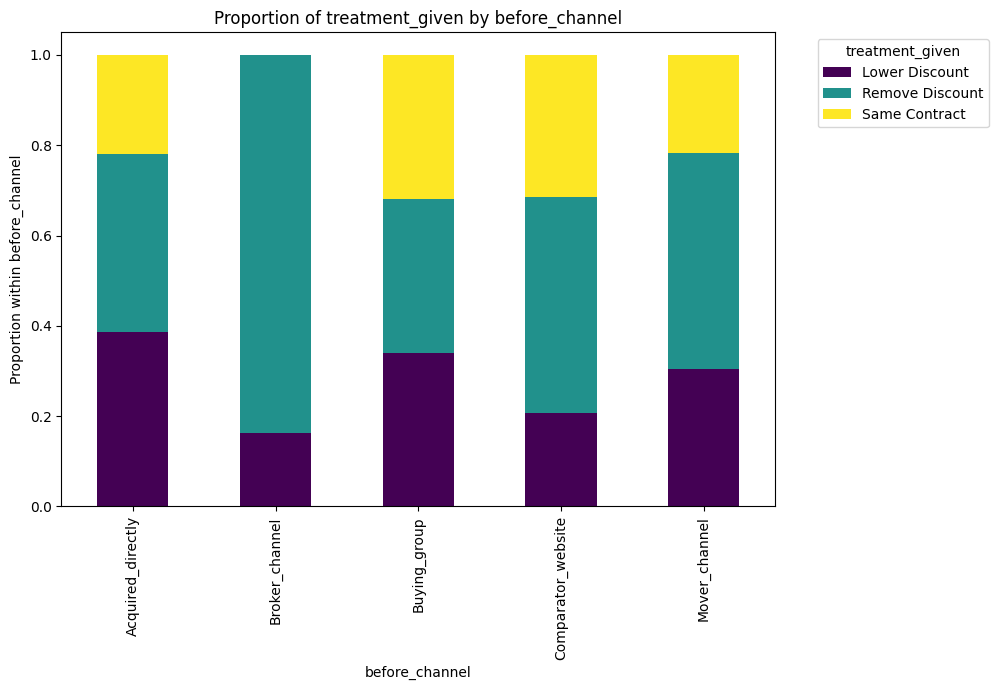

--------------------------------------------------

Plotting Proportion of 'treatment_given' by 'renewal_date'


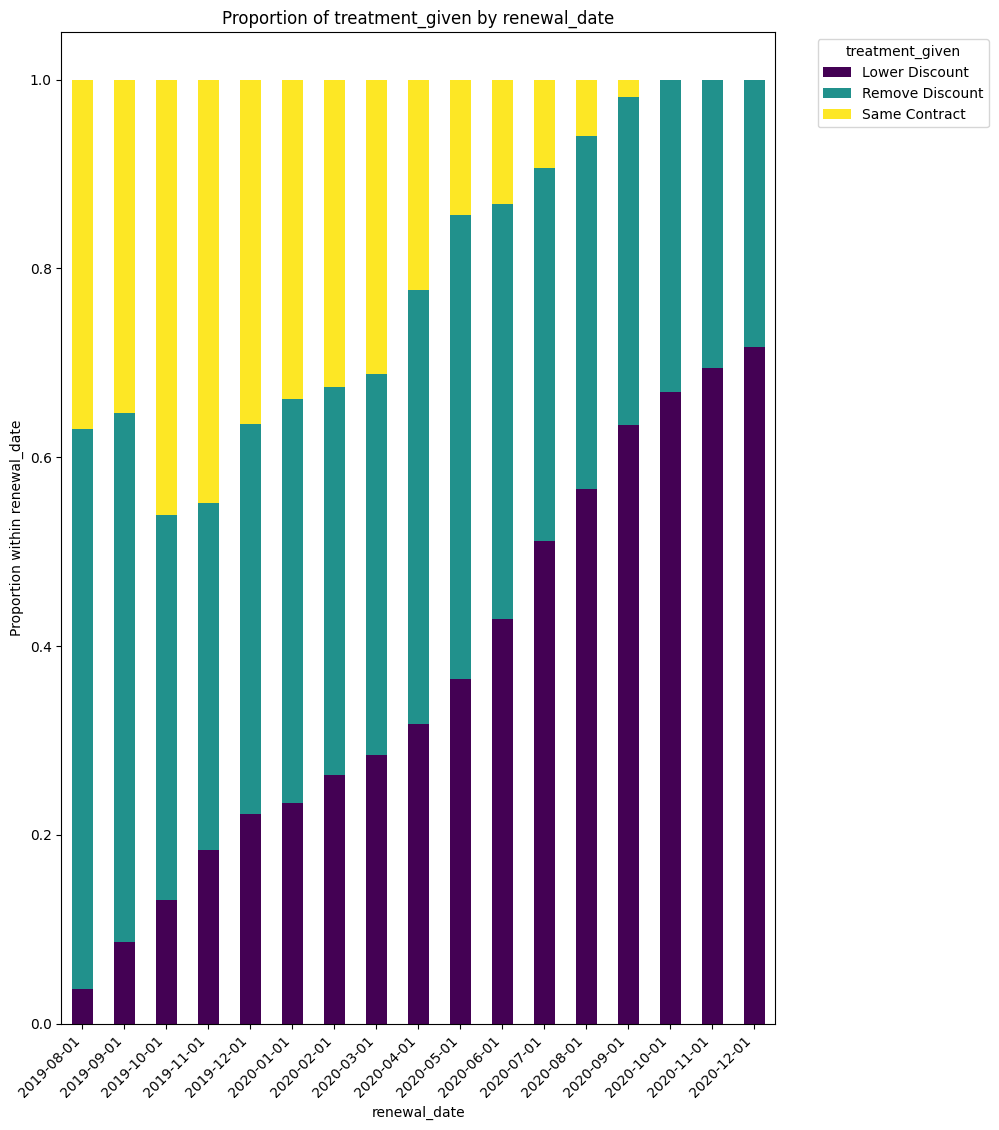

--------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and is already loaded

# Define the list of categorical features for pairwise comparison
# Exclude target ('renewal_outcome') and ID ('customer_id')
categorical_features_for_comparison = [
    'state',
    'communication_preference',
    'green',
    'dual_fuel_customer',
    'direct_debit_flag',
    'age',
    'before_channel',
    'renewal_date', # Treat as categorical strings
    'treatment_given'
]

print("--- Stacked Bar Plots Between Categorical Variables ---")
print(f"Generating plots for {len(categorical_features_for_comparison) * (len(categorical_features_for_comparison) - 1) // 2} unique pairs.")

for i in range(len(categorical_features_for_comparison)):
    for j in range(i + 1, len(categorical_features_for_comparison)):
        cat1 = categorical_features_for_comparison[i]
        cat2 = categorical_features_for_comparison[j]

        print(f"\nPlotting Proportion of '{cat2}' by '{cat1}'")

        try:
            crosstab_props = pd.crosstab(df[cat1], df[cat2], normalize='index')

            if crosstab_props.empty:
                 print(f"Skipping plot for {cat1} vs {cat2}: Crosstab is empty.")
                 continue

            figsize = (12, 7)
            if df[cat1].nunique() > 10:
                 figsize = (12, 8 + df[cat1].nunique() * 0.2) # Increase height

            crosstab_props.plot(kind='bar', stacked=True, figsize=figsize, colormap='viridis')

            # Set title and labels
            plt.title(f'Proportion of {cat2} by {cat1}')
            plt.xlabel(cat1)
            plt.ylabel(f'Proportion within {cat1}')

            # Rotate x-axis labels if necessary
            if df[cat1].nunique() > 10:
                plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

            # Add legend for the categories of the second variable
            plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside plot

            # Improve layout
            plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend

            # Display the plot
            plt.show()

        except Exception as e:
            print(f"Could not plot {cat1} vs {cat2}. Error: {e}")

        print("-" * 50) # Separator

In [ ]:



# Group the DataFrame by 'treatment_given' and describe the 'before_discount' column for each group
comparison_stats = df.groupby('treatment_given')['before_discount'].describe()

print(comparison_stats)

print("-" * 50)

                    count      mean       std  min   25%   50%   75%   max
treatment_given                                                           
Lower Discount   315352.0  0.167588  0.102714  0.0  0.10  0.16  0.23  0.51
Remove Discount  359135.0  0.155299  0.088979  0.0  0.10  0.15  0.21  0.44
Same Contract    194809.0  0.199860  0.079335  0.0  0.14  0.21  0.25  0.44
--------------------------------------------------


In [ ]:
comparison_stats = df.groupby('treatment_given')['discount_offered'].describe()

print(comparison_stats)

print("-" * 50)

                    count      mean       std  min   25%   50%   75%   max
treatment_given                                                           
Lower Discount   315274.0  0.102621  0.057055  0.0  0.06  0.10  0.14  0.36
Remove Discount  359247.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00
Same Contract    194809.0  0.199860  0.079335  0.0  0.14  0.21  0.25  0.44
--------------------------------------------------


In [ ]:
comparison_stats = df.groupby('treatment_given')['cust_tenure'].describe()

print(comparison_stats)

print("-" * 50)

                    count      mean       std  min  25%  50%  75%  max
treatment_given                                                       
Lower Discount   315397.0  3.844291  1.492354  0.0  3.0  5.0  5.0  5.0
Remove Discount  359247.0  3.014514  1.793269  0.0  1.0  3.0  5.0  5.0
Same Contract    194829.0  3.890766  1.464864  0.0  3.0  5.0  5.0  5.0
--------------------------------------------------


--- Visual Comparison of 'before_discount' by 'treatment_given' (Box Plot) ---


<ipython-input-62-8da93980a026>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_var, y=numerical_var, palette='viridis')


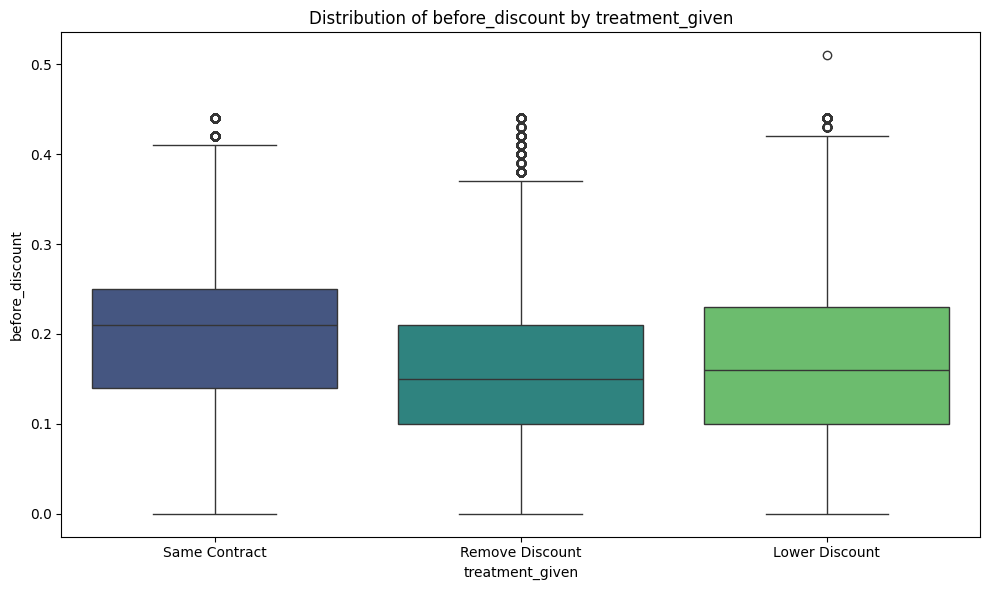

--------------------------------------------------


In [ ]:


categorical_var = 'treatment_given'
numerical_var = 'before_discount'

print(f"--- Visual Comparison of '{numerical_var}' by '{categorical_var}' (Box Plot) ---")

plt.figure(figsize=(10, 6))


sns.boxplot(data=df, x=categorical_var, y=numerical_var, palette='viridis')

plt.title(f'Distribution of {numerical_var} by {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel(numerical_var)



plt.tight_layout()
plt.show()

print("-" * 50)

<ipython-input-63-20870843b5e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='discount_offered', y='renewal_outcome', palette='viridis')


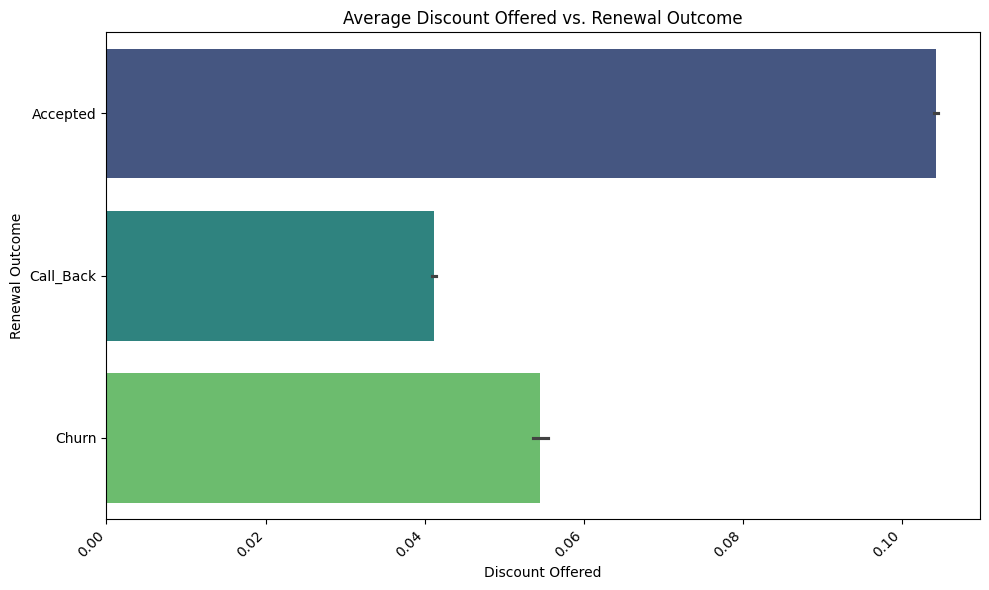

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='discount_offered', y='renewal_outcome', palette='viridis')
plt.title('Average Discount Offered vs. Renewal Outcome')
plt.xlabel('Discount Offered')
plt.ylabel('Renewal Outcome')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-64-6446d58a4577>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='discount_offered', y='renewal_outcome', palette='viridis')


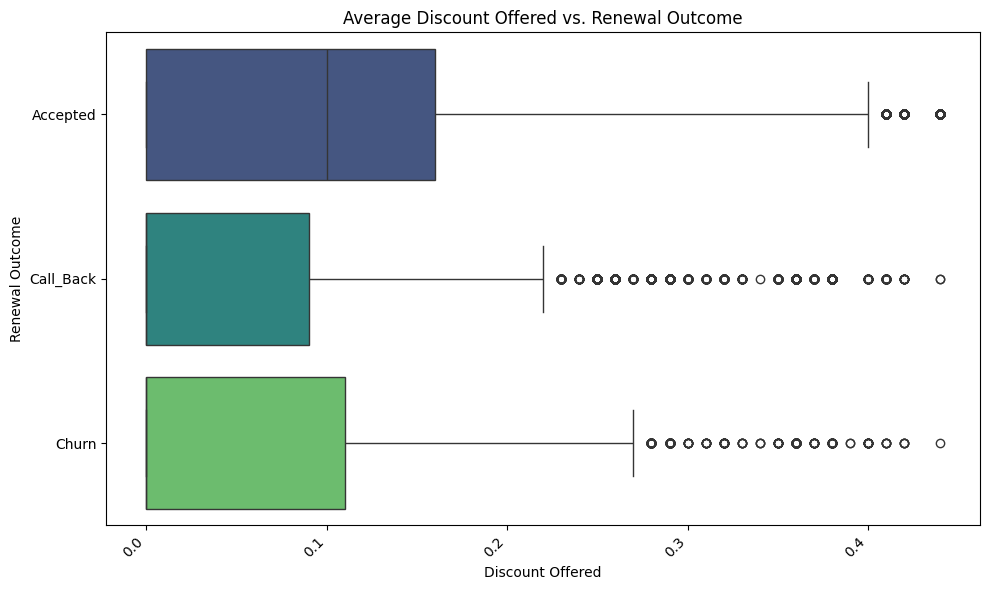

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='discount_offered', y='renewal_outcome', palette='viridis')
plt.title('Average Discount Offered vs. Renewal Outcome')
plt.xlabel('Discount Offered')
plt.ylabel('Renewal Outcome')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


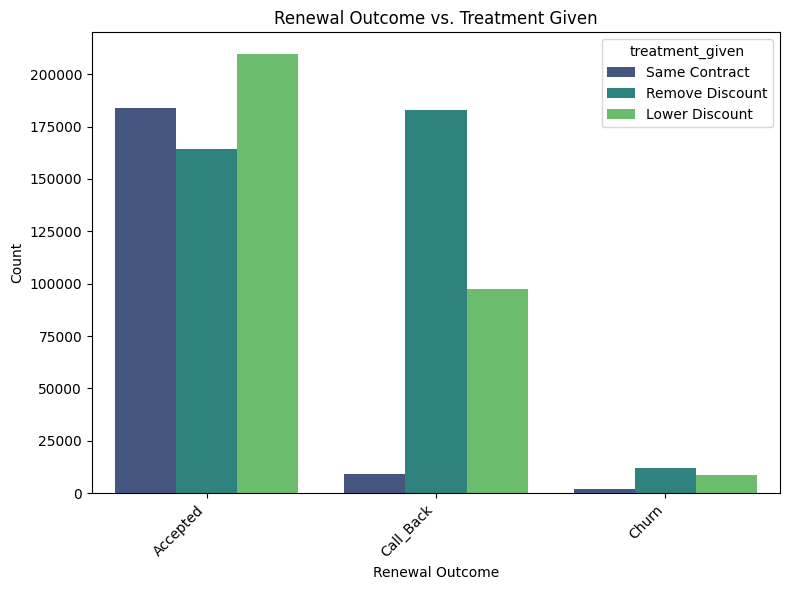

In [ ]:
# prompt: plot renewal_outcome and treatment_given

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='renewal_outcome', hue='treatment_given', palette='viridis')
plt.title('Renewal Outcome vs. Treatment Given')
plt.xlabel('Renewal Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


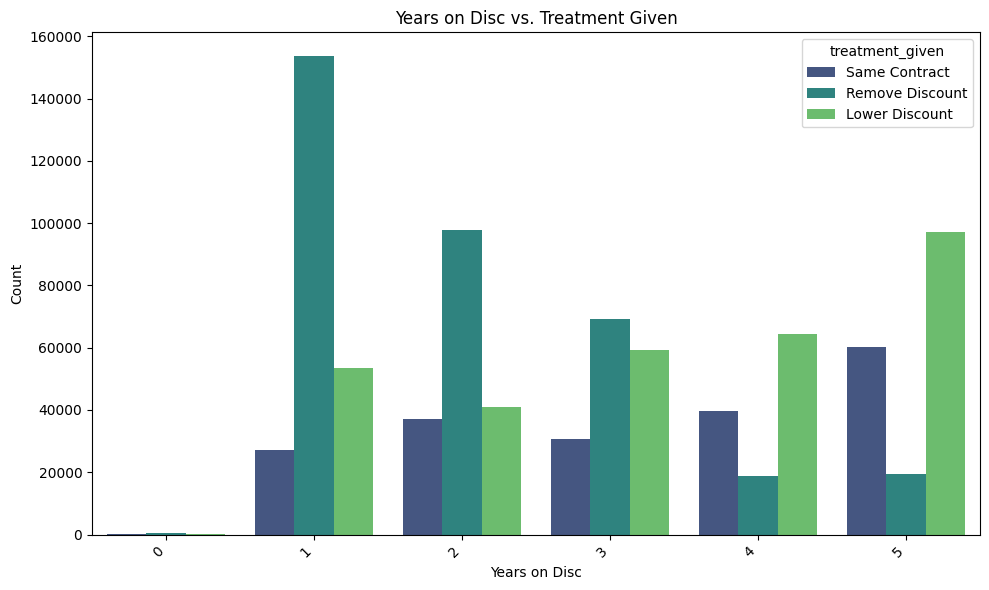

In [ ]:
# prompt: years_on_disc and treatment_given -- plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='years_on_disc', hue='treatment_given', palette='viridis')
plt.title('Years on Disc vs. Treatment Given')
plt.xlabel('Years on Disc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


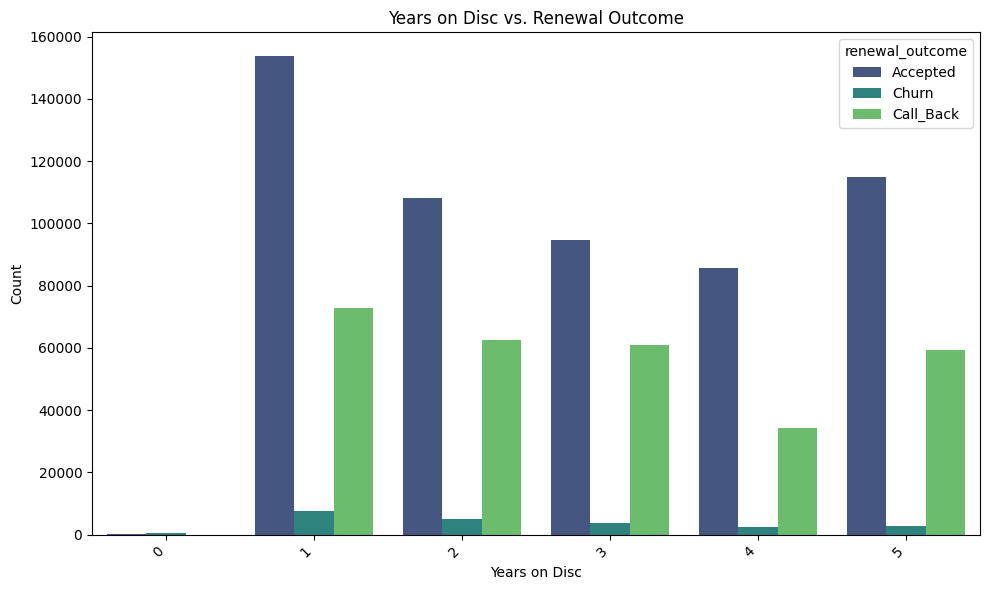

In [ ]:


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='years_on_disc', hue='renewal_outcome', palette='viridis')
plt.title('Years on Disc vs. Renewal Outcome')
plt.xlabel('Years on Disc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


In [ ]:
# prompt: years_on_disc, treatment_given and renewal_outcome

# Assuming 'df' is your DataFrame
print(df[['years_on_disc', 'treatment_given', 'renewal_outcome']].head())


   years_on_disc treatment_given renewal_outcome
0              3   Same Contract        Accepted
1              5   Same Contract        Accepted
2              4   Same Contract        Accepted
3              2   Same Contract        Accepted
4              5   Same Contract        Accepted


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

In [5]:
def engineer_features(df):
    print("\nEngineering features...")

    df_processed = df.copy()

    # Convert binary columns to 0/1
    binary_columns = ['green', 'dual_fuel_customer', 'direct_debit_flag']
    for col in binary_columns:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

    # Mark categorical columns
    categorical_columns = ['state', 'communication_preference', 'age',
                            'before_channel', 'treatment_given']

    for col in categorical_columns:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].astype('category')

    # Calculate discount change
    if 'before_discount' in df_processed.columns and 'discount_offered' in df_processed.columns:
        df_processed['discount_change'] = df_processed['discount_offered'] - df_processed['before_discount']

    # Extract month from renewal_date
    if 'renewal_date' in df_processed.columns:
        try:
            df_processed['renewal_month'] = pd.to_datetime(df_processed['renewal_date']).dt.month
            df_processed['renewal_month'] = df_processed['renewal_month'].astype('category')
        except:
            print("Could not convert renewal_date to datetime. Skipping this feature.")

    # Convert target variable to numerical labels
    renewal_outcome_mapping = {
        'Accepted': 0,
        'Call_Back': 1,
        'Churn': 2
    }
    df_processed['renewal_outcome'] = df_processed['renewal_outcome'].map(renewal_outcome_mapping)

    # Drop non-predictive columns
    columns_to_drop = ['customer_id', 'renewal_date']  # Add any other non-predictive columns
    df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')

    print(f"Processed dataframe shape: {df_processed.shape}")
    print(df_processed.head(10))
    return df_processed

def split_data(df, target_column='renewal_outcome'):
    print("\nSplitting data into train and test sets...")

    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")

    return X_train, X_test, y_train, y_test

def identify_column_types(df):
    categorical_columns = []
    numeric_columns = []

    for column in df.columns:
        if df[column].dtype.name in ['object', 'category']:
            categorical_columns.append(column)
        else:
            numeric_columns.append(column)

    print("\nColumn types:")
    print(f"Categorical columns: {categorical_columns}")
    print(f"Numeric columns: {numeric_columns}")

    return categorical_columns, numeric_columns

def create_preprocessing_pipeline(categorical_columns, numeric_columns):
    """Create a preprocessing pipeline that handles both categorical and numeric features"""

    # Define preprocessing for categorical features
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Define preprocessing for numeric features
    numeric_transformer = StandardScaler()

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_columns),
            ('num', numeric_transformer, numeric_columns)
        ],
        remainder='drop'  # Drop columns that aren't specified
    )

    return preprocessor

def train_xgboost_model(X_train, y_train, categorical_columns, numeric_columns):
    print("Training XGBoost model with hyperparameter tuning...")

    preprocessor = create_preprocessing_pipeline(categorical_columns, numeric_columns)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
            objective='multi:softprob',
            eval_metric='mlogloss',
            num_class=len(np.unique(y_train)),
            use_label_encoder=False,
            random_state=42
        ))
    ])

    param_grid = {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 6, 10],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0],
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )

    # Fit without sample weights
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Step 5: Evaluate the model
def evaluate_model(model, X_test, y_test):
    print("\nEvaluating model on test data...")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.named_steps['classifier'].classes_,
                yticklabels=model.named_steps['classifier'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    print("Confusion matrix saved as 'confusion_matrix.png'")

    return y_pred, y_prob

def analyze_feature_importance(model, X_train, categorical_columns, numeric_columns):
    print("\nAnalyzing feature importance...")

    # Get the random forest model from the pipeline
    rf_model = model.named_steps['classifier']

    # Get the preprocessing step
    preprocessor = model.named_steps['preprocessor']

    # Get feature names after preprocessing
    ohe = preprocessor.named_transformers_['cat']
    if hasattr(ohe, 'get_feature_names_out'):  # For newer sklearn versions
        cat_features = ohe.get_feature_names_out(categorical_columns)
    else:  # For older sklearn versions
        cat_features = ohe.get_feature_names(categorical_columns)

    feature_names = np.concatenate([cat_features, numeric_columns])

    # Get feature importances
    importances = rf_model.feature_importances_

    # Create a DataFrame to store feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Feature Importances')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("Feature importance chart saved as 'feature_importance.png'")

    return feature_importance_df


Engineering features...
Processed dataframe shape: (869473, 16)
     state communication_preference  green  dual_fuel_customer  \
0  State 1                   Letter    1.0                 0.0   
1  State 1                   Letter    1.0                 1.0   
2  State 1                   Letter    1.0                 1.0   
3  State 4                   Letter    1.0                 0.0   
4  State 1                   Letter    1.0                 0.0   
5  State 1                   Letter    1.0                 0.0   
6  State 1                   Letter    1.0                 0.0   
7  State 1                    Email    1.0                 0.0   
8  State 3                   Letter    1.0                 0.0   
9  State 2                   Letter    1.0                 0.0   

   direct_debit_flag      usage  cust_tenure  years_on_disc       age  \
0                  1   4.730801            5              3     45-55   
1                  1   2.443742            5              5   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:09:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}

Evaluating model on test data...

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81    139461
           1       0.65      0.51      0.57     72396
           2       0.97      0.03      0.05      5512

    accuracy                           0.73    217369
   macro avg       0.79      0.47      0.48    217369
weighted avg       0.72      0.73      0.71    217369

Confusion matrix saved as 'confusion_matrix.png'

Analyzing feature importance...
Feature importance chart saved as 'feature_importance.png'

Top 10 Feature Importances:
                           Feature  Importance
21   treatment_given_Same Contract    0.809856
19  treatment_given_Lower Discount    0.064740
36               direct_debit_flag    0.021169
11                         age_65+    0.017428
39    

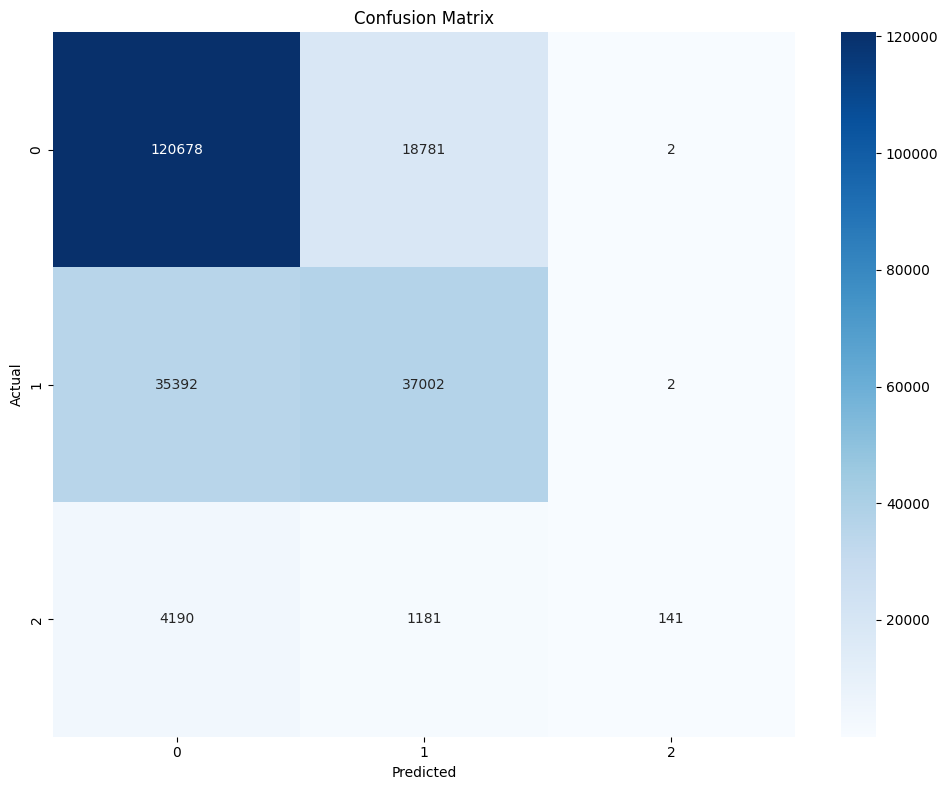

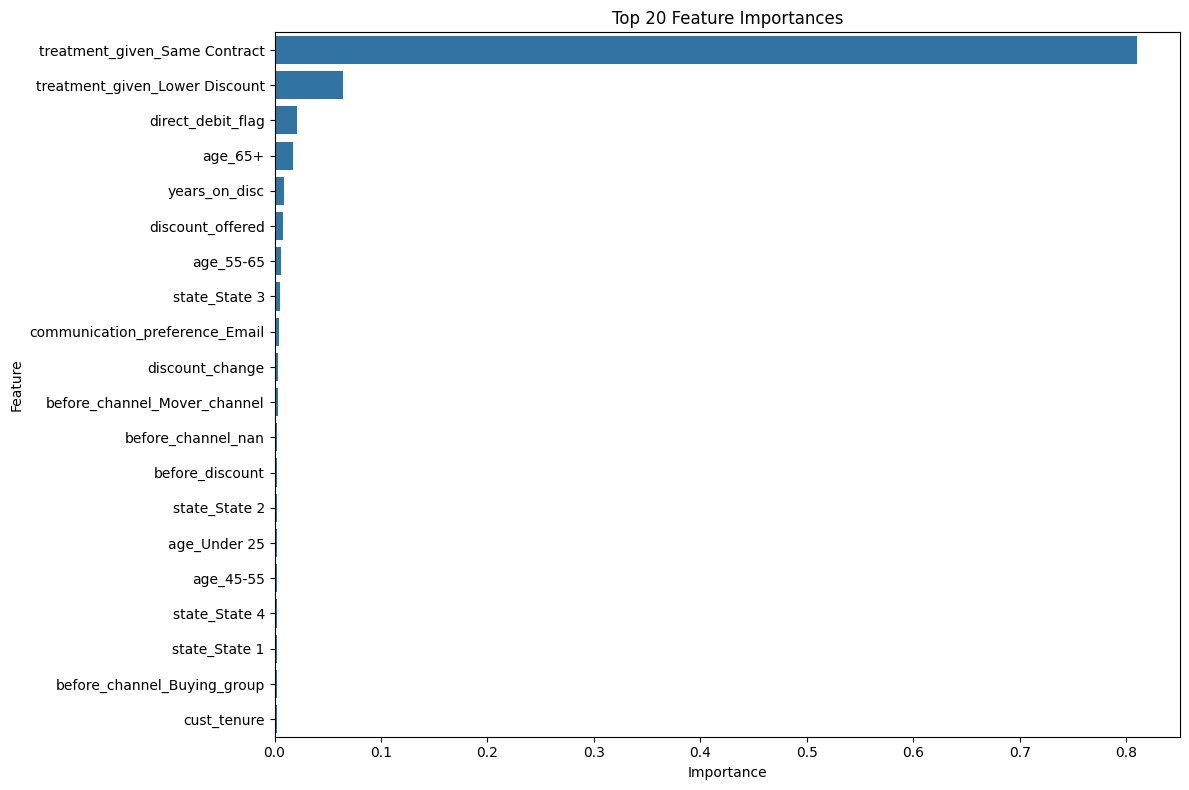

In [6]:

df_processed = engineer_features(df)

X_train, X_test, y_train, y_test = split_data(df_processed)

categorical_columns, numeric_columns = identify_column_types(X_train)

model =  train_xgboost_model(X_train, y_train, categorical_columns, numeric_columns)

y_pred, y_prob = evaluate_model(model, X_test, y_test)

feature_importance = analyze_feature_importance(model, X_train, categorical_columns, numeric_columns)

print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))

In [7]:
import joblib
import os

# Create a directory to store the model if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained model pipeline, replacing 'best_model' with 'model'
joblib.dump(model, "models/Xgboost_final.pkl") # Changed line

print("Model exported and saved as 'models/final_model.pkl'")

Model exported and saved as 'models/final_model.pkl'


In [ ]:
import joblib
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder

# 1. Load the trained model
model = joblib.load("/content/final_model (1).pkl")
print("Model loaded.")

# 2. Load or use X_test for prediction (assumed already defined in your session)
# You must have X_test from your previous pipeline (already preprocessed)

# 3. Predict class and probability
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# 4. Format the predictions DataFrame
results_df = X_test.copy()
results_df.reset_index(drop=True, inplace=True)

# Convert encoded predictions back to labels if needed
label_mapping = {
    0: "Accepted",
    1: "Call_Back",
    2: "Churn"
}
results_df["predicted_class"] = [label_mapping[i] for i in y_pred]

# Add probabilities for each class
class_names = ["prob_Accepted", "prob_Call_Back", "prob_Churn"]
for i, class_name in enumerate(class_names):
    results_df[class_name] = y_prob[:, i]

Model loaded.


NameError: name 'X_test' is not defined

In [ ]:
import pandas as pd
import joblib
from sqlalchemy import create_engine

# ---------------- Load your dataset ---------------- #
df = pd.read_csv("/content/Renewal_data_extract_new.csv")  # Replace with your actual data file

# ---------------- Feature Engineering ---------------- #
df_processed = engineer_features(df)

# ---------------- Separate features and target ---------------- #
X = df_processed.drop(columns=['renewal_outcome'], errors='ignore')
y = df_processed['renewal_outcome'] if 'renewal_outcome' in df_processed.columns else None

# ---------------- Load trained model ---------------- #
model = joblib.load("/content/final_model (1).pkl")
print(" Model loaded successfully.")

# ---------------- Make predictions ---------------- #
y_pred = model.predict(X)
y_prob = model.predict_proba(X)

# ---------------- Format predictions ---------------- #
results_df = X.copy().reset_index(drop=True)

label_mapping = {0: "Accepted", 1: "Call_Back", 2: "Churn"}
results_df["predicted_class"] = [label_mapping[i] for i in y_pred]

class_names = ["prob_Accepted", "prob_Call_Back", "prob_Churn"]
for i, class_name in enumerate(class_names):
    results_df[class_name] = y_prob[:, i]

# Optional: Add true labels if available
if y is not None:
    results_df["true_class"] = y.map(label_mapping)




Engineering features...
Processed dataframe shape: (869473, 16)
     state communication_preference  green  dual_fuel_customer  \
0  State 1                   Letter    1.0                 0.0   
1  State 1                   Letter    1.0                 1.0   
2  State 1                   Letter    1.0                 1.0   
3  State 4                   Letter    1.0                 0.0   
4  State 1                   Letter    1.0                 0.0   
5  State 1                   Letter    1.0                 0.0   
6  State 1                   Letter    1.0                 0.0   
7  State 1                    Email    1.0                 0.0   
8  State 3                   Letter    1.0                 0.0   
9  State 2                   Letter    1.0                 0.0   

   direct_debit_flag      usage  cust_tenure  years_on_disc       age  \
0                  1   4.730801            5              3     45-55   
1                  1   2.443742            5              5   

In [ ]:
results_df.head()

,state,communication_preference,green,dual_fuel_customer,direct_debit_flag,usage,cust_tenure,years_on_disc,age,before_discount,before_channel,treatment_given,discount_offered,discount_change,renewal_month,predicted_class,prob_Accepted,prob_Call_Back,prob_Churn,true_class
0,State 1,Letter,1.0,0.0,1,4.730801,5,3,45-55,0.22,Mover_channel,Same Contract,0.22,0.0,8,Accepted,0.913795,0.086172,0.000032,Accepted
1,State 1,Letter,1.0,1.0,1,2.443742,5,5,45-55,0.26,Acquired_directly,Same Contract,0.26,0.0,8,Accepted,0.918724,0.081247,0.000029,Accepted
2,State 1,Letter,1.0,1.0,1,1.809037,5,4,45-55,0.24,Acquired_directly,Same Contract,0.24,0.0,10,Accepted,0.940924,0.059055,0.000021,Accepted
3,State 4,Letter,1.0,0.0,1,4.488907,2,2,Under 25,0.18,Acquired_directly,Same Contract,0.18,0.0,8,Accepted,0.973925,0.026062,0.000013,Accepted
4,State 1,Letter,1.0,0.0,1,6.350824,5,5,65+,0.22,Mover_channel,Same Contract,0.22,0.0,9,Accepted,0.905532,0.094442,0.000026,Accepted
